# Forest Cover Type  Prediction
#### Submitted By: Haihui Cao, Felipe Vergara, Angshuman Paul
**Kaggle Link:** https://www.kaggle.com/c/forest-cover-type-prediction/ 

*Dataset Provided By: Jock A. Blackard and Colorado State University*

*Dataset Hosted By: Bache, K. & Lichman, M. (2013). <a href="http://archive.ics.uci.edu/ml">UCI Machine Learning Repository.</a> Irvine, CA: University of California, School of Information and Computer Science*

**Total Runtime for this notebook: 15 mins (approx.)**

## Contents

* [Overview](#Overview)
* [Data Description](#Data-Description)
* [Setup](#Setup)
* [Exploratory Data Analysis](#Exploratory-Data-Analysis)
    * [EDA Summary](#EDA-Summary)
* [Model Fitting and Predictions](#Model-Fitting-and-Predictions)
    * [Utility Functions](#Utility-Functions)
    * [Preprocessing](#Preprocessing)
    * [Principal Component Analysis](#Principal-Component-Analysis)
    * [Baseline Models](#Baseline-Models)
        * [1. KNN](#1.-KNN)
        * [2. Neural Network](#2.-Neural-Network)
        * [3. Decision Tree](#3.-Decision-Tree)
        * [4. Random Forest](#4.-Random-Forest)
        * [5. Gradient Boosting Classifier](#5.-Gradient-Boosting-Classifier)
        * [6. Extra Trees Classifier](#6.-Extra-Trees-Classifier)
        * [7. Support Vector Machines](#7.-Support-Vector-Machines)
        * [8. Adaboost](#8.-Adaboost)
    * [Summary of Baseline Models](#Summary-of-Baseline-Models)
    * [Feature Reduction](#Feature-Reduction)
    * [Feature Engineering](#Feature-Engineering)
    * [Summary of Feature Engineering](#Summary-of-Feature-Engineering)
* [Test Data Predictions](#Test-Data-Predictions)
* [Conclusions](#Conclusions)
* [Appendix](#Appendix)
    * [1. Gaussian Naive Bayes](#1.-Gaussian-Naive-Bayes)
    * [2. Bernoulli Naive Bayes](#2.-Bernoulli-Naive-Bayes)
    * [3. GMM](#3.-GMM)
    * [4. Linear Regression](#4.-Linear-Regression)
    * [5. Logistic Regression](#5.-Logistic-Regression)
    * [6. Stochastic Gradient Descent](#6.-Stochastic-Gradient-Descent)

## Overview

Back to [Contents](#Contents)

This project is based on the Kaggle Competition for 'Forest Cover Type Prediction'. In this competition we are asked to predict the forest cover type (the predominant kind of tree cover) from strictly cartographic variables (as opposed to remotely sensed data). The seven types are:
- 1 .Spruce/Fir
- 2 .Lodgepole Pine
- 3 .Ponderosa Pine
- 4 .Cottonwood/Willow
- 5 .Aspen
- 6 .Douglas-fir
- 7 .Krummholz

The actual forest cover type for a given 30 x 30 meter cell was determined from US Forest Service (USFS) Region 2 Resource Information System data. Independent variables were then derived from data obtained from the US Geological Survey and USFS. The data is in raw form (not scaled) and contains binary columns of data for qualitative independent variables such as wilderness areas and soil type.

This study area includes four wilderness areas located in the Roosevelt National Forest of northern Colorado. These areas represent forests with minimal human-caused disturbances, so that existing forest cover types are more a result of ecological processes rather than forest management practices.

## Data Description

Navigate to [Contents](#Contents)

The training set (15120 observations) contains both features and the Cover_Type. The test set (565892 observations) contains only the features. 

**Data Fields:**
- Elevation - Elevation in meters
- Aspect - Aspect in degrees azimuth
- Slope - Slope in degrees
- Horizontal_Distance_To_Hydrology - Horz Dist to nearest surface water features
- Vertical_Distance_To_Hydrology - Vert Dist to nearest surface water features
- Horizontal_Distance_To_Roadways - Horz Dist to nearest roadway
- Hillshade_9am (0 to 255 index) - Hillshade index at 9am, summer solstice
- Hillshade_Noon (0 to 255 index) - Hillshade index at noon, summer solstice
- Hillshade_3pm (0 to 255 index) - Hillshade index at 3pm, summer solstice
- Horizontal_Distance_To_Fire_Points - Horz Dist to nearest wildfire ignition points
- Wilderness_Area (4 binary columns, 0 = absence or 1 = presence) - Wilderness area designation
- Soil_Type (40 binary columns, 0 = absence or 1 = presence) - Soil Type designation
- Cover_Type (7 types, integers 1 to 7) - Forest Cover Type designation

The details of the wilderness areas and soil types are available in the <a href="https://www.kaggle.com/c/forest-cover-type-prediction/data">Kaggle Data Page</a> for this competition.

## Setup

Navigate to [Contents](#Contents)

In [1]:
#General Imports
import os
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns
from pandas.plotting import scatter_matrix

%matplotlib inline

In [2]:
#SKLearn Imports
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import SelectFromModel

from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.pipeline import Pipeline

from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA

from sklearn.metrics import confusion_matrix

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.ensemble import GradientBoostingClassifier as GDC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.mixture import GaussianMixture as GMM

/Users/apaul2/anaconda/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
#Setting for ignoring warning messages
np.warnings.filterwarnings('ignore')

#Set the seed value
SEED = 0
np.random.seed(SEED)

**NOTE: In order for the notebook to run properly, the notebook, train data file and test data file should be downloaded and placed in the same folder. Then the working directory can be set using code similar to the cell below.**

In [4]:
#Set working directories - Enable relevant directory when working
#Working Directory for AP 
os.chdir('/Users/apaul2/Documents/_Others/_Temp/mids/W207-AppliedMachineLearning/CourseMaterials/FinalProject/')

#Working Directory for HC
# os.chdir('/Users/HaihuiCao/Desktop/W207_MachineLearning/project/final')

#Working Directory for FV
# os.chdir('//home/felipe/berkeley/w207/projects/group_project/')

We start by loading the data from the csv files and inspecting the structure.

In [5]:
#Load Data
train_data_orig = pd.read_csv("train.csv")
test_data_orig = pd.read_csv("test.csv")

In [6]:
#Inspect Data Structure
train_data_orig.shape, test_data_orig.shape

((15120, 56), (565892, 55))

The train dataset has 15120 observations with 55 features each while the test dataset has 565892 observations with the same number of features.

In [7]:
#Ensure that the difference between train_data and test_data is only w.r.t the label column
set(train_data_orig.columns) - set(test_data_orig.columns)

{'Cover_Type'}

The train data has an additional column for the dependent column 'Cover Type'. We will separate this out as the label dataset. We will also drop this column from the train_data. 

In [8]:
#Rename longer column names to get cleaner labels in plots
train_data_orig.columns = train_data_orig.columns.str.replace('Horizontal_Distance_To_','HD.') 
train_data_orig.columns = train_data_orig.columns.str.replace('Vertical_Distance_To_','VD.')
train_data_orig.columns = train_data_orig.columns.str.replace('Hillshade_','HS.')
train_data_orig.columns = train_data_orig.columns.str.replace('Wilderness_Area','WA')
train_data_orig.columns = train_data_orig.columns.str.replace('Soil_Type','ST')

#Print the feature names
print(train_data_orig.columns)

Index(['Id', 'Elevation', 'Aspect', 'Slope', 'HD.Hydrology', 'VD.Hydrology',
       'HD.Roadways', 'HS.9am', 'HS.Noon', 'HS.3pm', 'HD.Fire_Points', 'WA1',
       'WA2', 'WA3', 'WA4', 'ST1', 'ST2', 'ST3', 'ST4', 'ST5', 'ST6', 'ST7',
       'ST8', 'ST9', 'ST10', 'ST11', 'ST12', 'ST13', 'ST14', 'ST15', 'ST16',
       'ST17', 'ST18', 'ST19', 'ST20', 'ST21', 'ST22', 'ST23', 'ST24', 'ST25',
       'ST26', 'ST27', 'ST28', 'ST29', 'ST30', 'ST31', 'ST32', 'ST33', 'ST34',
       'ST35', 'ST36', 'ST37', 'ST38', 'ST39', 'ST40', 'Cover_Type'],
      dtype='object')


Next, we copy the training data in a separate dataframe so that the original dataset is not impacted with any changes that are made. Then we remove the initial set of columns that are not required for training the models. Finally we shuffle the training data.

In [9]:
#Save the train_label to an independent data
train_label= train_data_orig['Cover_Type']

#Drop the column 'Cover Type'
train_data = train_data_orig.copy()
train_data.drop(['Cover_Type','Id'],axis=1, inplace=True)

In [10]:
#List of cover types
cover_types=['Spruce/Fir','Lodgepole Pine','Ponderosa Pine','Cottonwood/Willow','Aspen'
             ,'Douglas-fir','Krummholz']

In [11]:
#Shuffle training data and labels
shuffle=np.random.permutation(np.arange(train_data.shape[0]))
train_data, train_label = train_data.iloc[shuffle, :], train_label[shuffle]

In [12]:
#Check number of observations for each Cover Type
train_label.value_counts()

7    2160
6    2160
5    2160
4    2160
3    2160
2    2160
1    2160
Name: Cover_Type, dtype: int64

The training dataset has equal number of observations for each Cover Type.

We split the train data into train and dev so that we can evaluate the accuracy of the models without using the test data. We use a 75-25 split for the train and dev datasets.

In [13]:
#Split training data and labels using 75-25 split
train_data,dev_data,train_label,dev_label = train_test_split(train_data, train_label, test_size=0.25, 
                                                             random_state=SEED)
print("Train Data shape: {}, Train Labels shape: {}".format(train_data.shape, train_label.shape))
print("Dev Data shape: {}, Dev Labels shape: {}".format(dev_data.shape, dev_label.shape))

Train Data shape: (11340, 54), Train Labels shape: (11340,)
Dev Data shape: (3780, 54), Dev Labels shape: (3780,)


In [14]:
#Check number of labels for each Cover Type after data split
train_label.value_counts()

6    1642
3    1635
1    1629
4    1624
2    1620
7    1601
5    1589
Name: Cover_Type, dtype: int64

Although after the split,  the distribution of data for the different cover types is different, there isn't much difference in the number of observations and we have good representation for each cover type in the training data. 

## Exploratory Data Analysis

Back to [Contents](#Contents)

We start our Exploratory Data Analysis (EDA) by looking at a sample of the training data and also some basic stats on the feature columns.

In [15]:
#Check a sample of the training data 
pd.set_option('display.max_columns', None)
train_data.head()

,Elevation,Aspect,Slope,HD.Hydrology,VD.Hydrology,HD.Roadways,HS.9am,HS.Noon,HS.3pm,HD.Fire_Points,WA1,WA2,WA3,WA4,ST1,ST2,ST3,ST4,ST5,ST6,ST7,ST8,ST9,ST10,ST11,ST12,ST13,ST14,ST15,ST16,ST17,ST18,ST19,ST20,ST21,ST22,ST23,ST24,ST25,ST26,ST27,ST28,ST29,ST30,ST31,ST32,ST33,ST34,ST35,ST36,ST37,ST38,ST39,ST40
9175,3322,135,12,180,0,1931,239,235,124,3255,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3982,2159,335,7,0,0,1110,205,231,165,779,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8373,3426,177,14,540,226,2418,226,247,150,782,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
14332,3377,169,25,300,148,3813,229,241,127,3042,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
9285,3426,193,16,558,114,4227,216,251,164,2932,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [16]:
#Analyis of some basic stats for the training data
train_data.describe()

,Elevation,Aspect,Slope,HD.Hydrology,VD.Hydrology,HD.Roadways,HS.9am,HS.Noon,HS.3pm,HD.Fire_Points,WA1,WA2,WA3,WA4,ST1,ST2,ST3,ST4,ST5,ST6,ST7,ST8,ST9,ST10,ST11,ST12,ST13,ST14,ST15,ST16,ST17,ST18,ST19,ST20,ST21,ST22,ST23,ST24,ST25,ST26,ST27,ST28,ST29,ST30,ST31,ST32,ST33,ST34,ST35,ST36,ST37,ST38,ST39,ST40
count,11340.000000,11340.000000,11340.000000,11340.000000,11340.000000,11340.000000,11340.000000,11340.000000,11340.000000,11340.000000,11340.000000,11340.000000,11340.000000,11340.000000,11340.000000,11340.000000,11340.000000,11340.000000,11340.000000,11340.000000,11340.0,11340.0,11340.000000,11340.000000,11340.000000,11340.000000,11340.000000,11340.000000,11340.0,11340.000000,11340.000000,11340.000000,11340.000000,11340.000000,11340.000000,11340.000000,11340.000000,11340.000000,11340.0,11340.000000,11340.000000,11340.000000,11340.000000,11340.000000,11340.000000,11340.000000,11340.000000,11340.000000,11340.000000,11340.000000,11340.000000,11340.000000,11340.000000,11340.000000
mean,2747.014815,156.388448,16.491799,226.888007,50.993034,1710.786155,212.706261,218.887743,135.047972,1510.739153,0.237390,0.031834,0.420194,0.310582,0.023810,0.041623,0.062169,0.057407,0.011640,0.041975,0.0,0.0,0.000705,0.142416,0.027778,0.014286,0.031481,0.011199,0.0,0.007760,0.038977,0.004321,0.002734,0.009877,0.000970,0.022928,0.050088,0.018166,0.0,0.003527,0.001058,0.000617,0.083951,0.047884,0.021517,0.046561,0.041005,0.001411,0.006349,0.000617,0.002469,0.047884,0.043386,0.029453
std,417.885454,110.035110,8.418449,210.589579,61.113620,1323.852299,30.525810,22.863028,45.791405,1095.571868,0.425502,0.175566,0.493612,0.462752,0.152462,0.199734,0.241473,0.232630,0.107265,0.200542,0.0,0.0,0.026552,0.349492,0.164343,0.118671,0.174623,0.105237,0.0,0.087753,0.193549,0.065595,0.052215,0.098893,0.031131,0.149680,0.218137,0.133557,0.0,0.059289,0.032514,0.024839,0.277326,0.213529,0.145106,0.210706,0.198311,0.037538,0.079432,0.024839,0.049631,0.213529,0.203734,0.169081
min,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2374.000000,64.000000,10.000000,67.000000,5.000000,752.000000,196.000000,207.000000,106.000000,726.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2749.000000,125.000000,15.000000,180.000000,32.000000,1315.000000,220.000000,222.000000,138.000000,1260.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3100.000000,260.000000,22.000000,324.000000,79.250000,2264.000000,235.000000,235.000000,167.000000,1989.500000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3849.000000,360.000000,52.000000,1343.000000,554.000000,6836.000000,254.000000

An analysis of the basic stats show the following:
- All features have a count of 11340 indicating that no data is missing for any of the features in the training dataset.
- Columns 'Wilderness_Area1' through 'Wilderness_Area4' and 'Soil_Type1' through 'Soil_Type40' have binary data. These are 'one-hot' encoded. Columns Soil_Type7 and Soil_Type15 just have 0s (min, max and std = 0) and can be removed.
- 'Vertical_Distance_To_Hydrology' has negative values which is suspicious for vertical distances and requires further analysis.
- All columns other than the ones for the wilderness area and soil types appear to have continuous data.

In [17]:
#Check data distribution by cover type
train_data_orig.drop(['Id'], axis=1).groupby('Cover_Type').agg(('mean','std'))

Elevation                  Aspect                  Slope  \
                   mean         std        mean         std       mean   
Cover_Type                                                               
1           3128.025926  156.124988  159.463426  117.280496  13.112963   
2           2922.540278  185.778268  151.097222  107.320930  13.423611   
3           2398.423148  194.108147  173.672685  108.013267  20.628704   
4           2223.420370  102.929940  138.099537   88.846589  18.468519   
5           2786.801389   96.177469  137.992130   91.772285  16.724537   
6           2423.276852  188.966981  180.617130  133.087862  18.986111   
7           3362.769907  109.126811  155.794444  110.912616  14.166667   

                     HD.Hydrology             VD.Hydrology             \
                 std         mean         std         mean        std   
Cover_Type                                                              
1           6.817153   271.507407  221.250993    41.281481  55.740461   
2           7.038483   287.728704  215.373206    47.337963  59.137843   
3           8.888591   210.723148  142.053957    64.081944  58.333807   
4           9.361156   104.537500  138.452917    40.143519  58.343108   
5           8.440048   208.873148  179.159524    50.871296  58.463641   
6           7.714618   160.095370  125.770515    44.873611  47.034674   
7           7.315810   346.904630  293.786336    68.945833  80.400320   

            HD.Roadways                   HS.9am                HS.Noon  \
                   mean          std        mean        std        mean   
Cover_Type                                                                
1           2579.715741  1495.176212  211.690278  25.399338  223.248611   
2           2425.791667  1629.381089  214.044444  25.033870  225.369907   
3            969.595833   620.000509  201.655556  40.366706  216.561111   
4            915.100463   361.208979  227.968056  24.288340  216.889815   
5           1329.318519  1041.100986  223.368981  22.487451  218.317130   
6           1064.980556   576.384899  193.562963  33.684031  209.960648   
7           2713.659722  1206.313419  216.639815  23.561316  222.412037   

                           HS.3pm            HD.Fire_Points               \
                  std        mean        std           mean          std   
Cover_Type                                                                 
1           17.975428  144.065741  36.114843    1994.412963  1249.350813   
2           18.216843  142.950926  35.187638    2155.277315  1407.321563   
3           27.519785  141.549537  51.582375     916.909722   532.464556   
4           21.006249  111.808796  49.383949     860.540741   482.990176   
5           25.980805  121.392593  50.121931    1530.388889   976.589203   
6           23.934851  147.682407  45.588500    1057.654167   576.691004   
7           19.405921  136.193981  37.999255    2062.847222  1091.651985   

                 WA1                 WA2                 WA3            \
                mean       std      mean       std      mean       std   
Cover_Type                                                               
1           0.491667  0.500046  0.083796  0.277146  0.424537  0.494387   
2           0.525000  0.499490  0.030556  0.172150  0.435185  0.495896   
3           0.000000  0.000000  0.000000  0.000000  0.399537  0.489917   
4           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5           0.396296  0.489241  0.000000  0.000000  0.603704  0.489241   
6           0.000000  0.000000  0.000000  0.000000  0.445370  0.497122   
7           0.252315  0.434442  0.116667  0.321097  0.631019  0.482641   

                 WA4                 ST1                 ST2            \
                mean       std      mean       std      mean       std   
Cover_Type                                                               
1           0.000000  0.000000  0.000000  0.000000  0.000000  0.000

There are many columns with all zero values for 3 or more cover types. These features should be useful for differentiating between the cover types. The columns with continuous data don't have all zero values for any of the cover types. 'Soil_Type4' is the only column related to soil types that has non-zero means for all the cover types. None of the wilderness area columns have non-zero means for all the cover types. Some of the columns with continuous data have means that are very similar for all the cover types. Depending on their impact and importance amongst the overall featureset, these may be cause some confusion in predicting the correct cover types.

We create separate dataframes with just the columns containing continuous data so that we can analyze them further and also test models just using the continuous data.

In [18]:
#Create separate dataframe with the continuous variables to analyze them further
train_data_10 = train_data.iloc[:,:10]
train_data_rest = train_data.iloc[:,10:]

dev_data_10 = dev_data.iloc[:,:10]
dev_data_rest = dev_data.iloc[:,10:]

We then check the skew distribution for the entire training dataset. The values that are closer to zero are less skewed. Some normalization could help in some of the cases depending on their distance from zero. We also inspect the scatter plot for the columns with continuous data to get a visual understanding of their distribution as well as to check if the correlation between any of these columns stand out.

In [19]:
#Distribution skewness
print(train_data.skew())

Elevation          0.074516
Aspect             0.454248
Slope              0.525081
HD.Hydrology       1.505690
VD.Hydrology       1.526779
HD.Roadways        1.244131
HS.9am            -1.087802
HS.Noon           -0.956653
HS.3pm            -0.334661
HD.Fire_Points     1.597787
WA1                1.234573
WA2                5.334149
WA3                0.323412
WA4                0.818803
ST1                6.247777
ST2                4.590689
ST3                3.626965
ST4                3.805797
ST5                9.107294
ST6                4.568683
ST7                0.000000
ST8                0.000000
ST9               37.614824
ST10               2.046667
ST11               5.747809
ST12               8.187321
ST13               5.367013
ST14               9.291152
ST15               0.000000
ST16              11.220729
ST17               4.764732
ST18              15.115997
ST19              19.050071
ST20               9.913928
ST21              32.065278
ST22               6

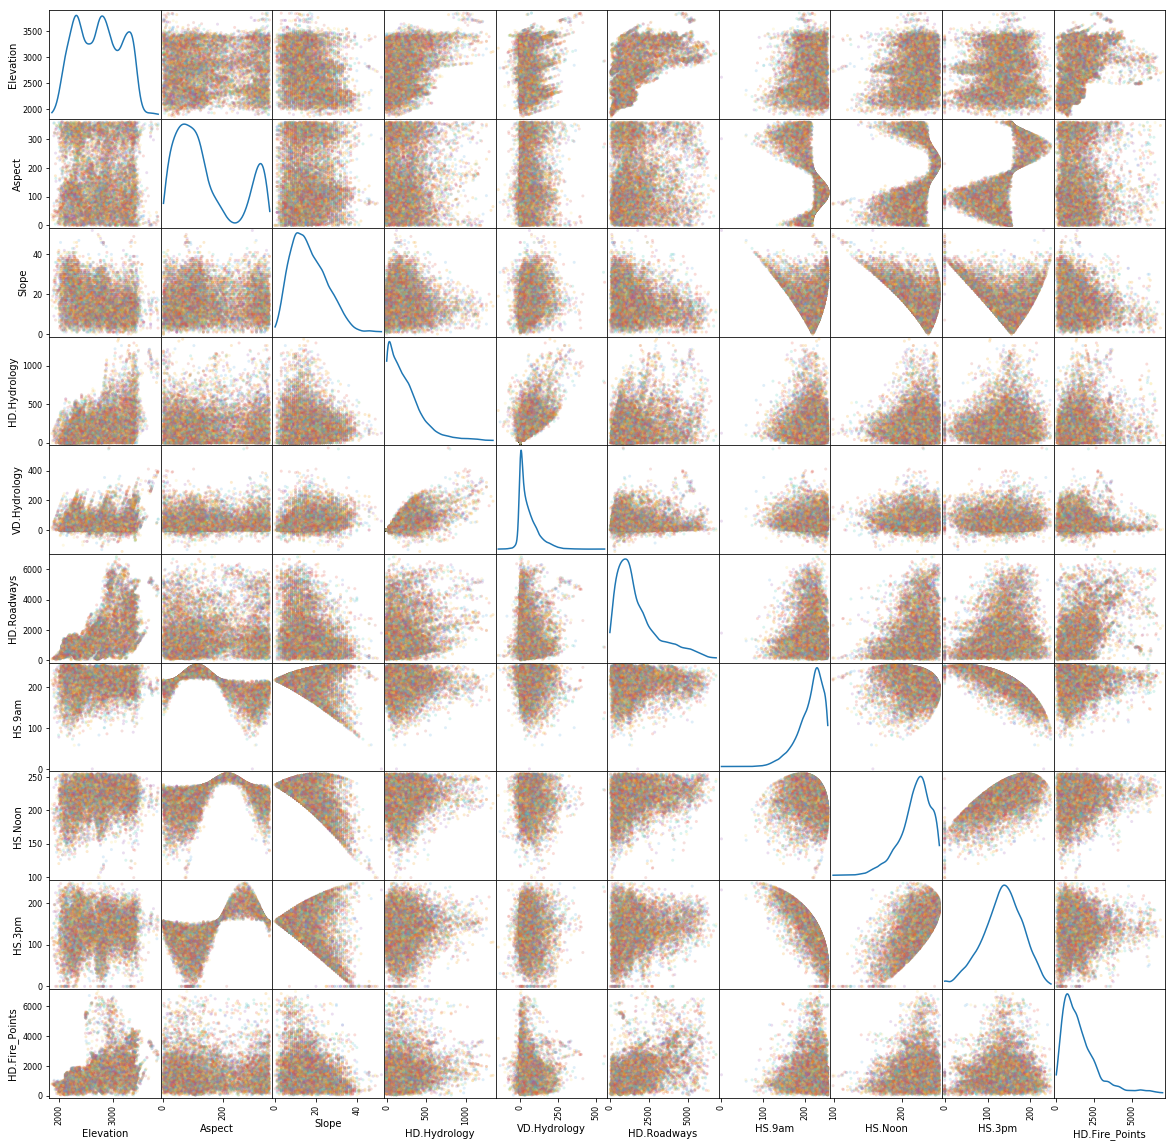

In [20]:
#Check the scatter matrix of the first 10 features of train_data
sctr_colors = ['#CD6155', '#9B59B6', '#5DADE2', '#48C9B0','#F7DC6F', '#F39C12', '#E74C3C']
scatter_matrix(train_data_10, alpha=0.2, figsize=(20, 20), diagonal='kde', c=sctr_colors)
plt.show()

An analysis of the skew distribution and the scatter plot shows the following:
- Slope, VD.Hydrology, HD.Hydrology, HD.Roadways and HD.Fire_Points display distributions that are very skewed to the left while HS.9am and HS.Noon have right skewed distributions. It may be worthwhile to normalize these data points before using them in a model.
- VD.Hydrology and HD.Hydrology appear to be positively correlated. 
- HS.3pm shares a sigmoid relationship with Aspect.

We also inspect the correlation matrix for the columns with continuous data to inspect the corrrelation between these variables further.

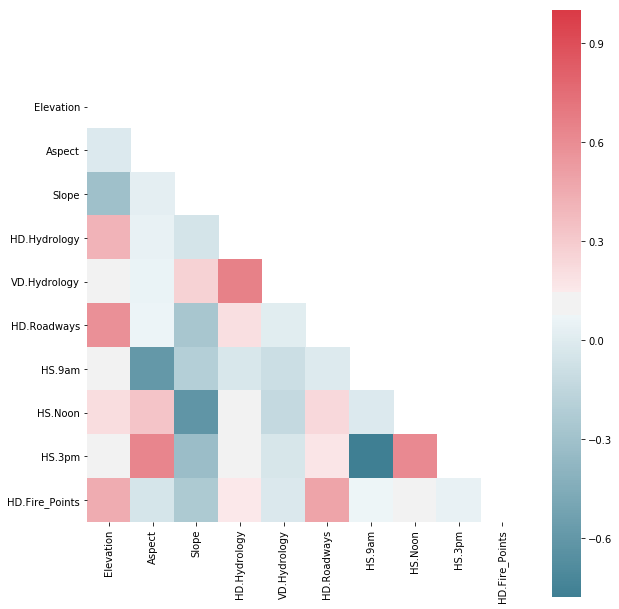

In [21]:
corr = train_data_10.corr()
#Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

#Use seaborn to create a pretty correlation heatmap
fig, ax = plt.subplots(figsize=(9, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, ax=ax,  square=True)
fig.tight_layout()

We see that HD.Roadways & Elevation, HS.3pm & Aspect as well as HS.3pm and HS.noon are highly correlated. Depending on our initial models perform, we may try using only one of the features from the highly correlated pairs, especially when testing the regression models.

We next analyze the distribution of the data for the columns related to 'Wilderness Area' and 'Soil Type'.

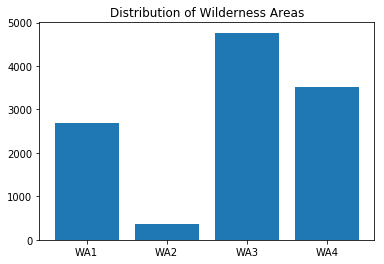

In [22]:
#Data Frame for Wilderness Area columns
df_wild_area=train_data.iloc[:,10:14]

#Data Frame with counts of each Wilderness Area
df_wild_area_plt = pd.DataFrame([(lbl, sum(df_wild_area[lbl])) for lbl in df_wild_area.columns]).pivot_table(index=0, values=1)

#Plot counts of Wilderness Areas
plt.title("Distribution of Wilderness Areas")
plt.bar(df_wild_area_plt.index, df_wild_area_plt[1])
plt.show()

The training data consists of data for wilderness area 3 predominantly. There seem to be enough data points for wilderness areas 1 and 4 as well. Compared to the other 3, data points for wilderness area 2 are very less. Since the distribution of the data for wilderness types is not uniform, it may be a good idea to use cross validation when using these as features in the models.

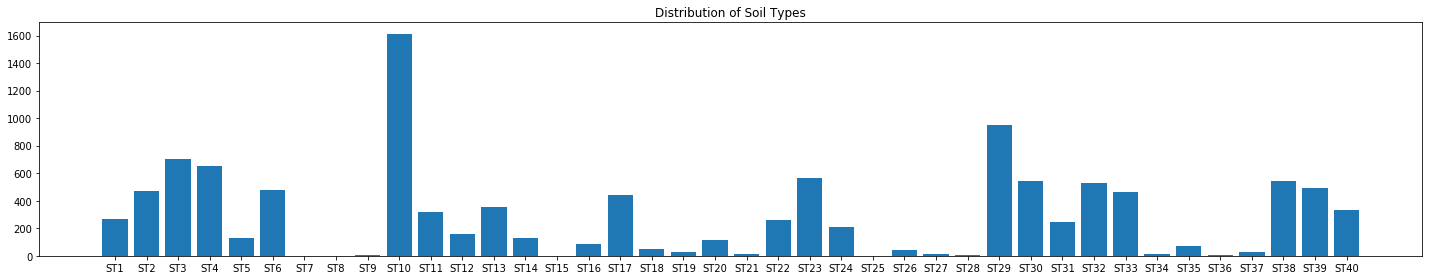

In [23]:
# Data Frame for Soil Type columns
df_soil_typ=train_data.iloc[:,14:]

# Data Frame with counts of each Soil Type
df_soil_typ_plt = pd.DataFrame([(lbl, sum(df_soil_typ[lbl])) for lbl in df_soil_typ.columns]) \
                    .pivot_table(index=0, values=1).reset_index()
df_soil_typ_plt.columns = ['SoilType','Count']
df_soil_typ_plt.index = df_soil_typ_plt.SoilType.map(lambda x: int(x.replace('ST','')))
df_soil_typ_plt.sort_index(axis=0, level= 'int', inplace=True)

#Plot counts of Wilderness Areas
fig=plt.figure(figsize=(20,4))
plt.title("Distribution of Soil Types")
plt.bar(df_soil_typ_plt.SoilType, df_soil_typ_plt.Count)
plt.tight_layout()
plt.show()

The training data has the maximum number of data points corresponding to soil type 10. Soil Types 7, 8, 9, 15, 21, 25, 27, 28 and 36 have the least representation. Since the distribution of the data for soil types is not uniform, it may be a good idea to use cross validation when using these as features for prediction.

### EDA Summary 

Back to [Contents](#Contents)

The key findings from the EDA are summarized below:
      
1. Train dataset: 15120 observations, 55 features    
   Test dataset:  565892 observations, 55 features      
   Label types: 7 
         
2. We dropped ID feature and split the train data into train and dev with 75-25 splits. After split:        
   Train Data shape: (11340, 54), Train Labels shape: (11340,)     
   Dev Data shape: (3780, 54), Dev Labels shape: (3780,)      
           
3. Slope, VD.Hydrology, HD.Hydrology, HD.Roadways and HD.Fire_Points display distributions that are very skewed to the left while HS.9am and HS.Noon have right skewed distributions. It may be worthwhile to normalize these data points before using them in a model.       
              
4. We see that HD.Roadways & Elevation, HS.3pm & Aspect as well as HS.3pm and HS.noon are highly correlated. We should probably use only one of the features from the highly correlated pairs when testing the regression models.    
         
5. The training data consists of data for wilderness area 3 predominantly. There seem to be enough data points for wilderness areas 1 and 4 as well. Compared to the other 3, data points for wilderness area 2 are very less. Since the distribution of the data for wilderness types is not uniform, it may be a good idea to use cross validation when using these as features.     
          
6. The training data has the maximum number of data points corresponding to soil type 10. Soil Types 7, 8, 9, 15, 21, 25, 27, 28 and 36 have the least representation. Since the distribution of the data for soil types is not uniform, it may be a good idea to use cross validation when using these as features.       
   

## Model Fitting and Predictions

### Utility Functions

Back to [Contents](#Contents)

Based on the EDA, we plan to test out different classification models with following variations to get the baseline predictions:
1. **Base Data** - Model and Predict using the base data
2. **Standardized Data** - Model and Predict after standardizing the data
3. **Binarized Data** - Model and Predict after binarizing the columns containing continuous data
4. **Cross Validation** - Model and Predict by splitting the train and dev data in different ways to avoid bias caused by unbalanced distribution of data in the feature columns
5. **Continuous Data** - Model and Predict only using the continuous data columns
6. **Reduced Data** - Model and Predict using a reduced set of features based on the outcome of the Principal Component Analysis.

For the baseline predictions, we plan to try out various classification models and then pick the best performing ones for coming up with the final model.

To start, we create separate functions for testing out the 6 variations described above and timing them. All these functions return a list containing the model type, the accuracy of the model as well as the predicted labels.

We also created a wrapper function which calls these individal functions based on the parameters that are passed. The wrapper function will be called for all the classifier models so as to test their predictions for the different variations. The wrapper function returns a list of all the model variations tested along with the corresponding accuracies and predictions.

In [24]:
#Function for testing models using Base data
def test_base(model, l_model):
    start_time=time.time()
    model.fit(train_data, train_label)
    preds=model.predict(dev_data)
    end_time=time.time()
    time_taken=end_time - start_time 
    acc=model.score(dev_data, dev_label)
    print("\nTime taken by Base Model: {:3.3f}".format(time_taken))
    print("Accuracy for Base Model: {:3.2%}".format(acc))
    
    #Append appropriate values to list and return
    l_model[0].append("Base")
    l_model[1].append(acc)
    l_model[2].append(preds)
    return l_model

In [25]:
#Function for testing models using Standardized data
#Uses 'Pipeline' to build composite estimators with Standardization and the Classifier
def test_standardized(model, l_model):
    start_time=time.time()
    pipeline_m = Pipeline([("std_scalar",std_scalar), ("model",model)])
    pipeline_m.fit(train_data.values, train_label.values)
    preds = pipeline_m.predict(dev_data.values)
    end_time=time.time()
    time_taken=end_time - start_time
    acc = pipeline_m.score(dev_data.values, dev_label.values)
    print("\nTime taken by Standardized Model: {:3.3f}".format(time_taken))
    print("Accuracy for Standardized Model: {:3.2%}".format(acc))
    
    #Append appropriate values to list and return
    l_model[0].append("Standardized")
    l_model[1].append(acc)
    l_model[2].append(preds)
    return l_model

In [26]:
#Function for testing models with binarized data
def test_binarized(model, l_model):
    start_time=time.time()
    model.fit(binarized_train_data, train_label)
    preds = model.predict(binarized_dev_data)
    end_time=time.time()
    time_taken=end_time - start_time
    acc = model.score(binarized_dev_data, dev_label)
    print("\nTime taken by Binarized Data Model: {:3.3f}".format(time_taken))
    print("Accuracy for Binarized Data Model: {:3.2%}".format(acc))
    
    #Append appropriate values to list and return
    l_model[0].append("Binarized")
    l_model[1].append(acc)
    l_model[2].append(preds)
    return l_model

In [27]:
#Function for testing models with cross validation
def test_cv(model, l_model):
    start_time=time.time()
    #Contruct a KFolds object with 40 splits to account for the 40 soil types
    kf=KFold(40, shuffle=True)
    for train_index, test_index in kf.split(train_data.values):
        X_train, X_test=train_data.values[train_index], train_data.values[test_index]
        y_train = train_label.values[train_index]
        model.fit(X_train, y_train)
    preds = model.predict(dev_data.values)
    end_time=time.time()
    time_taken=end_time - start_time
    acc = model.score(dev_data.values, dev_label.values)
    print("\nTime taken by Cross Validation Model: {:3.3f}".format(time_taken))
    print("Accuracy for Cross Validation Model: {:3.2%}".format(acc))
    
    #Append appropriate values to list and return
    l_model[0].append("Cross Validation")
    l_model[1].append(acc)
    l_model[2].append(preds)
    return l_model

In [28]:
#Function for testing models using only continuous data elements the first 10 features
def test_continuous(model, l_model):
    start_time=time.time()
    model.fit(train_data_10, train_label)
    preds = model.predict(dev_data_10)
    end_time=time.time()
    time_taken=end_time - start_time
    acc = model.score(dev_data_10, dev_label)
    print("\nTime taken by Continuous Data Model: {:3.3f}".format(time_taken))
    print("Accuracy for Continuous Data Model: {:3.2%}".format(acc))
    
    #Append appropriate values to list and return
    l_model[0].append("Continuous")
    l_model[1].append(acc)
    l_model[2].append(preds)
    return l_model

In [29]:
#Function for testing models using reduced features by PCA
def test_reduced(model, l_model):
    start_time=time.time()
    model.fit(train_data_red, train_label)
    preds = model.predict(dev_data_red)
    end_time=time.time()
    time_taken=end_time - start_time
    acc = model.score(dev_data_red, dev_label)
    print("\nTime taken by Feature Reduced Data Model: {:3.3f}".format(time_taken))
    print("Accuracy for Feature Reduced Data Model: {:3.2%}".format(acc))
    
    #Append appropriate values to list and return
    l_model[0].append("Feature Reduced")
    l_model[1].append(acc)
    l_model[2].append(preds)
    return l_model

In [30]:
#Wrapper function for testing different variations for various models
def test_model_variations(model, base_m=True, std_m=True, bin_m=True, cv_m=True, cont_m=True, red_m=True):
    #Initialize lists for storing model type, accuracy, predictions
    #as well as the actual model
    l_typ=[]
    l_acc=[]
    l_pred=[]
    #Wrapper list containing the above lists
    l_model=[l_typ, l_acc, l_pred]
    
    #Call individual functions for testing model variations
    print("\nModel: {}\n".format(model))
    if base_m:
        l_model = test_base(model, l_model)
    if std_m:
        l_model = test_standardized(model, l_model)
    if bin_m:
        l_model = test_binarized(model, l_model)
    if cv_m:
        l_model = test_cv(model, l_model)
    if cont_m: 
        l_model = test_continuous(model, l_model)
    if red_m:
        l_model = test_reduced(model, l_model)
    return l_model

We also created a set of utility functions for binarizing the data, running the Grid Search CV to get the best parameters, printing the confusion matrix as well as for plotting the distribution of cover types based on the predicted labels. 

In [31]:
# Function to binarize data
def binarize_data(data):
    # Initialize a new feature array with the same shape as the original data.
    binarized_data = np.zeros(data.shape)
    # Set threshold based on mean and standard deviation
    thresholds = list(np.mean(data) + np.std(data))
    
    # Apply a threshold  to each feature.
    for feature in range(data.shape[1]):
        binarized_data[:,feature] = data.values[:,feature] > thresholds[feature]
    return binarized_data

In [32]:
#Get Grid CV parms
def get_best_parms(est, p_grid, scoring='accuracy'):
    gridcv = GridSearchCV(estimator=est, param_grid=p_grid)
    gridcv.fit(train_data, train_label)
    return gridcv.best_params_

In [33]:
# Function to print confusion matrix
def print_confusion(dev_lbl, pred_lbl):
    cmatrix=confusion_matrix(dev_lbl, pred_lbl)
    print("\nConfusion Matrix:\n{}".format(cmatrix))
    
    #Calculate precision and recall
    worst_precision = np.argmin([cmatrix[i,i]/sum(cmatrix[:,i]) for i in range(7)]) + 1
    print("\nCover Type with worst precision: {}".format(worst_precision))
    worst_recall = np.argmin([cmatrix[i,i]/sum(cmatrix[i]) for i in range(7)]) + 1
    print("Cover Type with worst recall: {}".format(worst_recall))

    #Most confused combination of cover types are assumed to be the ones that resulted in maximum
    #number of false positives or false negatives
    most_confused_index = np.where(cmatrix==max(cmatrix[i,j] for i in range(7) for j 
                                                in range(7) if i != j))
    print("Most confused cover types combination is ({},{})".format(most_confused_index[0][0] + 1, 
                                                           most_confused_index[1][0] + 1))
    print("Labels for the most confused cover type combination are ({},{})".format(cover_types[most_confused_index[0][0]], 
                                                           cover_types[most_confused_index[1][0]]))

In [34]:
# Function to plot predicted cover type distribution
def plot_cover(pred_lbls, model): 
    pred_ctype = pd.DataFrame(pd.DataFrame(pred_lbls)[0].value_counts()).reset_index()
    pred_ctype.columns=['CoverType','Count']
    plt.bar(pred_ctype.CoverType, pred_ctype.Count)
    plt.title("Cover Type Prediction Using {}".format(model))
    plt.show()

### Preprocessing

Back to [Contents](#Contents)

We then create dataframes with standardized train and dev data for use by the diffent models. 

In [35]:
#Create dataframes with Standardized training and dev data 
std_scalar = StandardScaler()
std_train_data = std_scalar.fit_transform(train_data)
std_dev_data = std_scalar.transform(dev_data)

We also create dataframes with binarized data. These are created by calling the binarize function to binarize the data for the columns with continuous data and concatenating the output the rest of the columns which are already in binary format.

In [36]:
#Binarize continuous data elements and combine with the binary columns
binarized_train_data = np.c_[binarize_data(train_data_10), train_data_rest]
binarized_dev_data = np.c_[binarize_data(dev_data_10), dev_data_rest]

### Principal Component Analysis

Back to [Contents](#Contents)

We then run the Principal Component Analysis to get an understanding of the principal components and how much variation can be attributed to each component.

In [37]:
pca = PCA()
pca.fit(train_data)
pca_evr = pca.explained_variance_ratio_

#Print the explained variance ratios of the first 10 components
for k in range(10):
        print("{:^35}|{:^35.4f}".format(k + 1, np.sum(pca_evr[:k + 1])))

                 1                 |              0.7237               
                 2                 |              0.9476               
                 3                 |              0.9834               
                 4                 |              0.9946               
                 5                 |              0.9987               
                 6                 |              0.9994               
                 7                 |              0.9998               
                 8                 |              1.0000               
                 9                 |              1.0000               
                10                 |              1.0000               


We see that the first two components explain almost 95% of the variance while the first four explain alomost 99.5% of the variance.

We then visualize the distribution using the first two components.

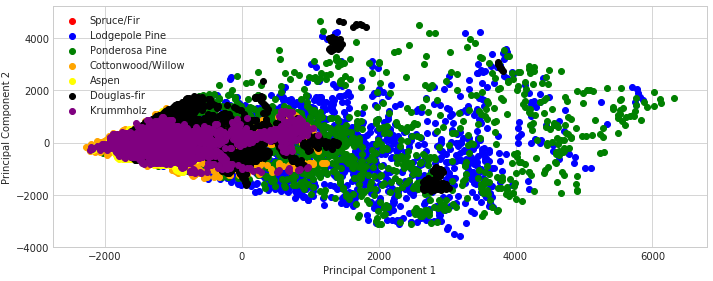

In [38]:
#PCA with 2 components for cluster representation
pca_model = PCA(n_components=2)
train_data_pca_two = pca_model.fit_transform(train_data)

#Plot after PCA 
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(10, 4))
    for index, lab, col in zip((0,1,2,3,4,5,6),('Spruce/Fir','Lodgepole Pine','Ponderosa Pine','Cottonwood/Willow','Aspen'
             ,'Douglas-fir','Krummholz'),('red', 'blue', 'green', 'orange', 'yellow', 'black', 'purple')):
        plt.scatter(train_data_pca_two[train_label==index, 0], train_data_pca_two[train_label==index, 1],label=lab,c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='upper left')
    plt.tight_layout()

With 2 components we cannot clearly observe the different clusters to identify different cover types. Ponderosa Pine and Lodgepole Pine has similar distribution within graph. So it is possible that a classification algorithm make wrong predictions with only 2 components on PCA.

We also look at the cumulative explained variance with 10 components.

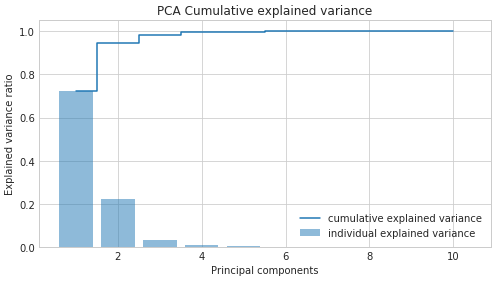

In [39]:
#Run PCA on the data. Show the fraction of the total variance in the training data

exp_variance = []
cum_exp_variance = []

#PCA with 10 components
pca = PCA(n_components=10)
pca.fit(train_data)

#Plot the variance vs component numbers
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(7, 4))
    plt.title('PCA Cumulative explained variance')
    plt.bar(range(1,11), pca.explained_variance_ratio_, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(1,11), np.cumsum(pca.explained_variance_ratio_), where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

Based on the above analysis, we decide to test the models using 4 PCA components. We fit and transform the train and dev data so that they can be used for the predictions.

In [40]:
#PCA with 4 components
pca_red = PCA(n_components=4)
train_data_red = pca_red.fit_transform(train_data)
dev_data_red = pca_red.transform(dev_data)

pca_red_evr = pca_red.explained_variance_ratio_
print("Explained Variance Ratio using 4 Principal Components:\n{}" .format(pca_red_evr))
pca_red_com = pca_red.components_
print("\nEigen Vectors corrsponding to 4 Principal Components:\n{}".format(pca_red_com))

Explained Variance Ratio using 4 Principal Components:
[0.72373408 0.22386633 0.03584732 0.0111423 ]

Eigen Vectors corrsponding to 4 Principal Components:
[[ 1.76463130e-01  1.94843142e-03 -1.67195758e-03  3.21221861e-02
   3.78094249e-04  8.12747279e-01  6.82501137e-04  3.37902399e-03
   4.26585153e-03  5.54286857e-01  1.25252974e-04 -3.33636141e-06
   3.71524593e-05 -1.59069072e-04 -1.43627060e-05 -1.47210480e-05
  -2.95033329e-05 -1.52016251e-05 -7.10566902e-06 -1.93028672e-05
   0.00000000e+00  0.00000000e+00 -3.44926083e-07 -5.87688501e-05
  -7.57934284e-06  1.03435857e-05 -1.39202405e-06 -6.50413375e-06
   0.00000000e+00 -4.66956073e-07 -1.24096943e-05  2.34538803e-06
   1.64947952e-06  4.34830448e-06 -1.50068489e-07  1.00410191e-05
   1.94209952e-05  4.02966731e-06  0.00000000e+00  1.49080083e-06
   5.56682090e-07 -1.33267972e-07  5.40928688e-05 -3.87636763e-06
   1.89787698e-06  4.99169975e-06  8.14749328e-06  4.06524397e-07
   2.96276328e-06  3.25866944e-07  2.11407094e-06  2

### Baseline Models

Back to [Contents](#Contents)

We created models and predicted labels using various classifiers in order to get a baseline prediction and then picked the top performing models for further predictions using feature engineering and custom ensembles. Our initial predictions resulted in accuracies in order of 60-65% for most of the models except **KNN** which had more than **80% accuracy**. We then tried to improve the models using Grid Search CV for the parameters of interest  and used the resulting 'best parameter' values for further tuning of the models. For some of the models we used some additional parameters on top of the parameters tested with Grid Search CV in order to come up with the baselines. For each of the classifiers we tested, we tested out different variations of the training data using the [Utility Functions](#Utility-Functions) described earlier.

The Grid Search CV takes a long time to run (the duration varies depending on the parameters used and the classifier for which it is run). Hence we have commented out the cells with the Grid Search code for the various classifiers. The parameters used for the models in the sections below are the ones that resulted in the best accuracy.

Of the differnt classifiers we used to come up with the baselines, the ones that resulted in more than 80% accuracy are shown here. The rest of the classifiers we tested are shown in the [Appendix](#Appendix).

#### 1. KNN

Back to [Contents](#Contents)

In [41]:
# n_neighbors = [1,3,5,10,15,10]
# metric = ['manhattan','euclidean','minkowski'] 
# leaf_size = [5,10,20,30,50]
# p_grid = {'algorithm': algorithm, 'n_neighbors': n_neighbors, 'metric': metric, 'leaf_size': leaf_size}
# b_parm = get_best_parms(KNeighborsClassifier(), p_grid)
# b_parm


Model: KNeighborsClassifier(algorithm='auto', leaf_size=10, metric='manhattan',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')


Time taken by Base Model: 0.164
Accuracy for Base Model: 85.82%

Time taken by Standardized Model: 2.825
Accuracy for Standardized Model: 81.35%

Time taken by Continuous Data Model: 0.051
Accuracy for Continuous Data Model: 85.74%

Time taken by Feature Reduced Data Model: 0.022
Accuracy for Feature Reduced Data Model: 80.82%

 Maximum accuracy using K Nearest Neighbors: 85.82%


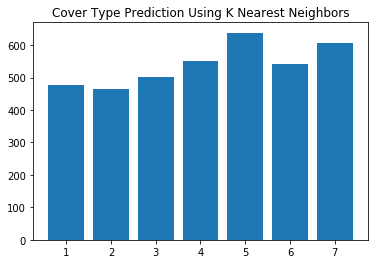

Predominant cover type predicted by K Nearest Neighbors model: Aspen

Confusion Matrix:
[[373  84   0   0  20   2  52]
 [ 92 361  18   0  46  16   7]
 [  0   6 430  20   9  60   0]
 [  0   0  11 518   0   7   0]
 [  1   7   2   0 560   1   0]
 [  1   3  41  14   3 456   0]
 [ 10   3   0   0   0   0 546]]

Cover Type with worst precision: 2
Cover Type with worst recall: 2
Most confused cover types combination is (2,1)
Labels for the most confused cover type combination are (Lodgepole Pine,Spruce/Fir)


In [42]:
model_name="K Nearest Neighbors"
knn_m = KNeighborsClassifier(n_neighbors=1, metric ='manhattan', leaf_size=10)
l_knn = test_model_variations(knn_m, True, True, False, False, True, True)

print("\n Maximum accuracy using {}: {:3.2%}".format(model_name, np.amax(l_knn[1])))
max_acc_ind=np.argmax(l_knn[1])  #Index for maximum accuray
best_preds=l_knn[2][max_acc_ind]  #Best prediction
#Plot best predicted results
plot_cover(best_preds, model_name)

print("Predominant cover type predicted by {} model: {}"
      .format(model_name, cover_types[np.unique(best_preds)
                                      [np.argmax(np.unique(best_preds, return_counts=True)[1])] - 1]))

#Generate confusion matrix to understand which cover types are causing
#more confusion in classifications. It may be worthwhile to try and 're-engineer'
#the features based on the most confused cover types
print_confusion(dev_label, best_preds)

#### 2. Neural Network

Back to [Contents](#Contents)

In [43]:
# activation = ['identity', 'logistic', 'tanh', 'relu'] 
# alphas = [0.00001, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]
# p_grid = {'activation': activation, 'alpha': alphas}
# b_parm = get_best_parms(MLPClassifier(verbose=True, random_state=SEED), p_grid)
# b_parm


Model: MLPClassifier(activation='tanh', alpha=1e-05, batch_size='auto', beta_1=0.1,
       beta_2=0.3, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)


Time taken by Base Model: 3.246
Accuracy for Base Model: 62.57%

Time taken by Standardized Model: 12.446
Accuracy for Standardized Model: 82.70%

Time taken by Binarized Data Model: 9.682
Accuracy for Binarized Data Model: 68.17%

 Maximum accuracy using Neural Network: 82.70%


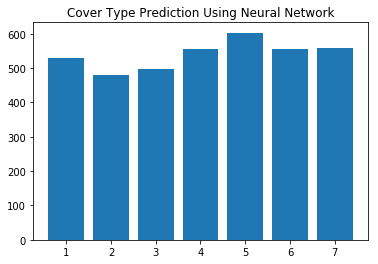

Predominant cover type predicted by Neural Network model: Aspen

Confusion Matrix:
[[381 100   1   3  16   1  29]
 [110 349  13   0  44  16   8]
 [  0   6 393  25  10  91   0]
 [  0   0   9 520   0   7   0]
 [  4  24   7   0 529   7   0]
 [  0   0  72   9   4 433   0]
 [ 35   1   2   0   0   0 521]]

Cover Type with worst precision: 1
Cover Type with worst recall: 2
Most confused cover types combination is (2,1)
Labels for the most confused cover type combination are (Lodgepole Pine,Spruce/Fir)


In [44]:
model_name="Neural Network"

mlp_m = MLPClassifier(activation='tanh', alpha=0.00001, random_state=SEED, beta_1 = 0.1, beta_2=0.3)
l_mlp = test_model_variations(mlp_m, True, True, True, False, False, False)

print("\n Maximum accuracy using {}: {:3.2%}".format(model_name, np.amax(l_mlp[1])))
max_acc_ind=np.argmax(l_mlp[1])  #Index for maximum accuray
best_preds=l_mlp[2][max_acc_ind]  #Best prediction

#Plot best predicted results
plot_cover(best_preds, model_name)

print("Predominant cover type predicted by {} model: {}"
      .format(model_name, cover_types[np.unique(best_preds)
                                      [np.argmax(np.unique(best_preds, return_counts=True)[1])] - 1]))

print_confusion(dev_label, best_preds)

#### 3. Decision Tree

Back to [Contents](#Contents)

In [45]:
# criterion = ['gini', 'entropy']
# max_features = [None, 20, 40, 'auto','log2'] 
# max_depth = [None, 20, 30, 40]
# class_weight=[None,'balanced']
# p_grid = {'class_weight': class_weight, 'criterion': criterion, 'max_features': max_features, 'max_depth': max_depth}
# b_parm = get_best_parms(DecisionTreeClassifier(random_state=SEED), p_grid)
# b_parm


Model: DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')


Time taken by Base Model: 0.174
Accuracy for Base Model: 80.08%

Time taken by Standardized Model: 0.190
Accuracy for Standardized Model: 80.05%

Time taken by Binarized Data Model: 0.031
Accuracy for Binarized Data Model: 68.07%

 Maximum accuracy using Decision Tree: 80.08%


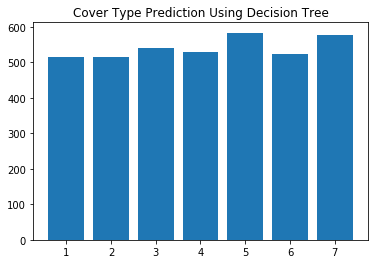

Predominant cover type predicted by Decision Tree model: Aspen

Confusion Matrix:
[[346 125   0   0  12   4  44]
 [129 321   9   0  53  19   9]
 [  0   6 421  16  14  68   0]
 [  0   0  25 502   0   9   0]
 [  8  49  12   0 497   5   0]
 [  0  13  74  10   4 417   0]
 [ 33   0   0   0   3   0 523]]

Cover Type with worst precision: 2
Cover Type with worst recall: 2
Most confused cover types combination is (2,1)
Labels for the most confused cover type combination are (Lodgepole Pine,Spruce/Fir)


In [46]:
model_name="Decision Tree"

dt_m = DecisionTreeClassifier(class_weight='balanced', criterion='entropy', max_features=None,max_depth=None, random_state=SEED)
l_dt = test_model_variations(dt_m, True, True, True, False, False, False)

print("\n Maximum accuracy using {}: {:3.2%}".format(model_name, np.amax(l_dt[1])))
max_acc_ind=np.argmax(l_dt[1])  #Index for maximum accuray
best_preds=l_dt[2][max_acc_ind]  #Best prediction

#Plot best predicted results
plot_cover(best_preds, model_name)

print("Predominant cover type predicted by {} model: {}"
      .format(model_name, cover_types[np.unique(best_preds)
                                      [np.argmax(np.unique(best_preds, return_counts=True)[1])] - 1]))

print_confusion(dev_label, best_preds)

#### 4. Random Forest

Back to [Contents](#Contents)

In [47]:
# criterion = ['gini', 'entropy']
# n_estimators = [50, 100, 150] 
# max_depth = [None, 20, 30, 40]
# min_samp_splt = [2,3,5]
# max_features = [None, 20, 40, 'log2','auto'] 
# p_grid = {'criterion': criterion, 'n_estimators': n_estimators, 'min_samples_split': min_samp_splt,
#           'max_features': max_features, 'max_depth': max_depth}
# b_parm = get_best_parms(RF(random_state=SEED), p_grid)
# b_parm


Model: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features=20, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)


Time taken by Base Model: 5.868
Accuracy for Base Model: 87.72%

Time taken by Standardized Model: 5.670
Accuracy for Standardized Model: 87.70%

Time taken by Binarized Data Model: 1.419
Accuracy for Binarized Data Model: 68.81%

 Maximum accuracy using Random Forest: 87.72%


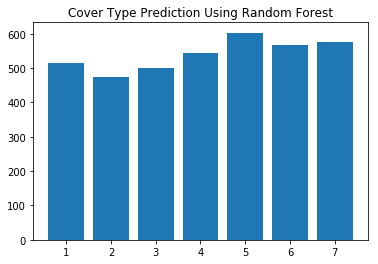

Predominant cover type predicted by Random Forest model: Aspen

Confusion Matrix:
[[411  78   1   0  11   2  28]
 [ 90 375  11   0  39  19   6]
 [  0   3 444  10   6  62   0]
 [  0   0   5 525   0   6   0]
 [  0  15   6   0 545   5   0]
 [  0   2  34   8   0 474   0]
 [ 15   0   0   0   2   0 542]]

Cover Type with worst precision: 2
Cover Type with worst recall: 2
Most confused cover types combination is (2,1)
Labels for the most confused cover type combination are (Lodgepole Pine,Spruce/Fir)


In [48]:
model_name="Random Forest"

rf_m = RF(criterion='entropy', n_estimators=150, min_samples_split=3, max_features=20,max_depth=None, random_state=SEED)
l_rf = test_model_variations(rf_m, True, True, True, False, False, False)

print("\n Maximum accuracy using {}: {:3.2%}".format(model_name, np.amax(l_rf[1])))
max_acc_ind=np.argmax(l_rf[1])  #Index for maximum accuray
best_preds=l_rf[2][max_acc_ind]  #Best prediction

#Plot best predicted results
plot_cover(best_preds, model_name)

print("Predominant cover type predicted by {} model: {}"
      .format(model_name, cover_types[np.unique(best_preds)
                                      [np.argmax(np.unique(best_preds, return_counts=True)[1])] - 1]))

print_confusion(dev_label, best_preds)

#### 5. Gradient Boosting Classifier

Back to [Contents](#Contents)

In [49]:
# n_estimators = [50, 100, 150] 
# max_depth = [3, 10, 25, 50]
# min_samp_splt = [2,3,5,7]
# p_grid = {'n_estimators': n_estimators, 'max_depth': max_depth, 'min_samples_splt': min_samp_splt}
# b_parm = get_best_parms(GDC(random_state=SEED), p_grid)
# b_parm


Model: GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=25,
              max_features=20, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=7,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False)


Time taken by Base Model: 59.764
Accuracy for Base Model: 88.12%

Time taken by Standardized Model: 64.400
Accuracy for Standardized Model: 88.17%

Time taken by Binarized Data Model: 54.416
Accuracy for Binarized Data Model: 68.97%

 Maximum accuracy using Gradient Boosting Classifier: 88.17%


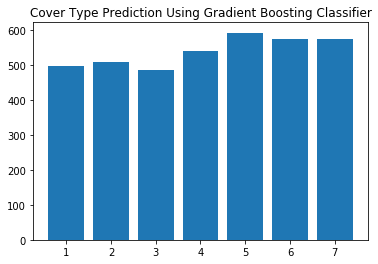

Predominant cover type predicted by Gradient Boosting Classifier model: Aspen

Confusion Matrix:
[[403  88   1   0   8   2  29]
 [ 80 396  10   0  35  14   5]
 [  0   5 440  11   4  65   0]
 [  0   0   8 524   0   4   0]
 [  2  16   5   0 543   5   0]
 [  0   2  23   7   0 486   0]
 [ 14   1   0   0   3   0 541]]

Cover Type with worst precision: 2
Cover Type with worst recall: 2
Most confused cover types combination is (1,2)
Labels for the most confused cover type combination are (Spruce/Fir,Lodgepole Pine)


In [50]:
model_name="Gradient Boosting Classifier"

gdc_m = GDC(n_estimators=100, max_depth=25, max_features=20, min_samples_split=7,random_state=SEED)
l_gdc = test_model_variations(gdc_m, True, True, True, False, False, False)

print("\n Maximum accuracy using {}: {:3.2%}".format(model_name, np.amax(l_gdc[1])))
max_acc_ind=np.argmax(l_gdc[1])  #Index for maximum accuray
best_preds=l_gdc[2][max_acc_ind]  #Best prediction

#Plot best predicted results
plot_cover(best_preds, model_name)

print("Predominant cover type predicted by {} model: {}"
      .format(model_name, cover_types[np.unique(best_preds)
                                      [np.argmax(np.unique(best_preds, return_counts=True)[1])] - 1]))

print_confusion(dev_label, best_preds)

#### 6. Extra Trees Classifier

Back to [Contents](#Contents)

In [51]:
# n_estimators = [50, 100, 150] 
# criterion = ['gini', 'entropy']
# max_depth = [None, 20, 30, 40]
# max_features = [None, 20, 'log2','auto'] 
# p_grid = {'criterion': criterion, 'n_estimators': n_estimators, 'max_depth': max_depth,'max_features': max_features}
# b_parm = get_best_parms(ExtraTreesClassifier(random_state=SEED), p_grid)
# b_parm


Model: ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='entropy',
           max_depth=30, max_features=54, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)


Time taken by Base Model: 4.349
Accuracy for Base Model: 88.68%

Time taken by Standardized Model: 4.511
Accuracy for Standardized Model: 88.68%

Time taken by Binarized Data Model: 3.199
Accuracy for Binarized Data Model: 68.41%

 Maximum accuracy using Extra Trees Classifier: 88.68%


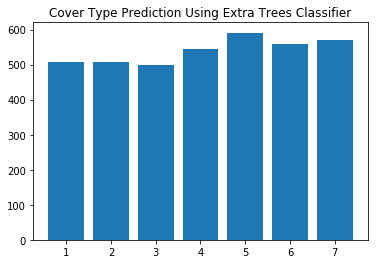

Predominant cover type predicted by Extra Trees Classifier model: Aspen

Confusion Matrix:
[[408  85   1   0   7   2  28]
 [ 80 401  11   0  28  16   4]
 [  0   5 449  13   7  51   0]
 [  0   0   7 526   0   3   0]
 [  1  13   4   0 547   6   0]
 [  0   2  28   6   0 482   0]
 [ 18   0   0   0   2   0 539]]

Cover Type with worst precision: 2
Cover Type with worst recall: 2
Most confused cover types combination is (1,2)
Labels for the most confused cover type combination are (Spruce/Fir,Lodgepole Pine)


In [52]:
model_name="Extra Trees Classifier"
etc_m = ExtraTreesClassifier(criterion='entropy', n_estimators=150, max_features=54,
          max_depth=30, random_state=SEED)
l_etc = test_model_variations(etc_m, True, True, True, False, False, False)

print("\n Maximum accuracy using {}: {:3.2%}".format(model_name, np.amax(l_etc[1])))
max_acc_ind=np.argmax(l_etc[1])  #Index for maximum accuray
best_preds=l_etc[2][max_acc_ind]  #Best prediction

#Plot best predicted results
plot_cover(best_preds, model_name)

print("Predominant cover type predicted by {} model: {}"
      .format(model_name, cover_types[np.unique(best_preds)
                                      [np.argmax(np.unique(best_preds, return_counts=True)[1])] - 1]))

print_confusion(dev_label, best_preds)

#### 7. Support Vector Machines

Back to [Contents](#Contents)

In [53]:
# gamma = [0.3, 'auto','scale']
# kernel = ['linear', 'poly', 'rbf'] 
# class_weight = ['balanced', None]
# p_grid = {'class_weight': class_weight, 'kernel': kernel, 'gamma': gamma}
# b_parm = get_best_parms(SVC(random_state=SEED), p_grid)


Model: SVC(C=10.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.3, kernel='rbf',
  max_iter=-1, probability=True, random_state=0, shrinking=True,
  tol=0.0001, verbose=False)


Time taken by Standardized Model: 42.047
Accuracy for Standardized Model: 83.47%

Time taken by Binarized Data Model: 21.488
Accuracy for Binarized Data Model: 68.52%

 Maximum accuracy using SVM: 83.47%


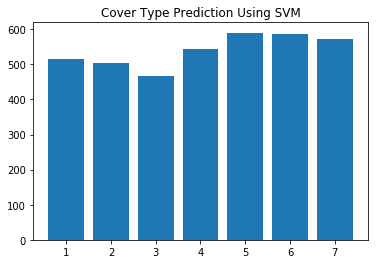

Predominant cover type predicted by SVM model: Aspen

Confusion Matrix:
[[379 108   1   0  11   2  30]
 [104 361  11   0  41  17   6]
 [  0   9 389  22   9  96   0]
 [  0   0  10 513   0  13   0]
 [  6  21   9   0 527   8   0]
 [  3   5  47  10   2 451   0]
 [ 24   0   0   0   0   0 535]]

Cover Type with worst precision: 2
Cover Type with worst recall: 2
Most confused cover types combination is (1,2)
Labels for the most confused cover type combination are (Spruce/Fir,Lodgepole Pine)


In [54]:
model_name="SVM"
svc_m = SVC(C=10.0, class_weight='balanced', gamma=0.3, kernel='rbf', probability=True, random_state=SEED, tol=0.0001)  
l_svc = test_model_variations(svc_m, False, True, True, False, False, False)

print("\n Maximum accuracy using {}: {:3.2%}".format(model_name, np.amax(l_svc[1])))
max_acc_ind=np.argmax(l_svc[1])  #Index for maximum accuray
best_preds=l_svc[2][max_acc_ind]  #Best prediction

#Plot best predicted results
plot_cover(best_preds, model_name)

print("Predominant cover type predicted by {} model: {}"
      .format(model_name, cover_types[np.unique(best_preds)
                                      [np.argmax(np.unique(best_preds, return_counts=True)[1])] - 1]))

print_confusion(dev_label, best_preds)

####  8. Adaboost

Back to [Contents](#Contents)

In [55]:
#Best models for Extra Trees, Gradient Descent, Random Forest and Decision Tree Classifiers
best_etc_am=ExtraTreesClassifier(criterion='entropy', n_estimators=150, max_features=54,
          max_depth=30, random_state=SEED)
best_gdc_am = GDC(n_estimators=100, max_depth=25, max_features=20, min_samples_split=7,random_state=SEED)
best_rf_am = RF(criterion='entropy', n_estimators=150, min_samples_split=3, max_features=20,max_depth=None, random_state=SEED)
best_dt_am = DecisionTreeClassifier(class_weight='balanced', criterion='entropy', max_features=None,max_depth=None, random_state=SEED)

#Dict for the classifiers with better accuracy using base models
d_models={'ExtraTreesClassifier': best_etc_am, 'RandomForestClassifier': best_rf_am, 'DecisionTreeClassifier': best_dt_am}
#Dict for the classifiers with better accuracy using standardized models
d_std_models={'GradientBoostingClassifier': best_gdc_am}

#Run adaboost for classifiers using base models
for m_name, model in d_models.items():
    start_time=time.time()
    abc_m = AdaBoostClassifier(base_estimator=model, 
                               n_estimators=500,random_state=SEED)
    abc_m.fit(train_data, train_label)
    abc_m_pred = abc_m.predict(dev_data)
    end_time=time.time()
    time_taken=end_time - start_time
    print ('\nTime taken by {}: {:3.3f}'.format(m_name, time_taken))
    print ('Accuracy for {}: {:3.2%}'
           .format(m_name, abc_m.score(dev_data,dev_label)))
    
#Run adaboost for classifiers using standardized models
for m_name, model in d_std_models.items():
    start_time=time.time()
    abc_m = AdaBoostClassifier(base_estimator=model, 
                               n_estimators=500,random_state=SEED)
    abc_m.fit(std_train_data, train_label)
    abc_m_pred = abc_m.predict(std_dev_data)
    end_time=time.time()
    time_taken=end_time - start_time
    print ('\nTime taken by {}: {:3.3f}'.format(m_name, time_taken))
    print ('Accuracy for {}: {:3.2%}'
           .format(m_name, abc_m.score(std_dev_data,dev_label)))


Time taken by ExtraTreesClassifier: 4.829
Accuracy for ExtraTreesClassifier: 88.94%

Time taken by RandomForestClassifier: 5.736
Accuracy for RandomForestClassifier: 87.59%

Time taken by DecisionTreeClassifier: 0.136
Accuracy for DecisionTreeClassifier: 80.37%

Time taken by GradientBoostingClassifier: 60.521
Accuracy for GradientBoostingClassifier: 87.72%


We notice that Extra Trees and Decision Trees Classifiers with Adaboost actually perform better as compared to the corresponding models without Adaboost.

### Summary of Baseline Models

Back to [Contents](#Contents)

Of the different variations we tried for the various models, the ones that resulted in more than 80% accuracy are listed here in order of accuracy:

1. Extra Trees Classifier with Adaboost, Maximum accuracy: 88.94%
2. Extra Trees Classifier, Maximum accuracy: 88.68%
3. Gradient Boosting Classifier, Maximum accuracy: 88.17%
4. Random Forest Classifier, Maximum accuracy: 87.72%
5. Gradient Boosting Classifier with Adaboost, Maximum accuracy: 87.72%
6. Random Forest Classifier with Adaboost, Maximum accuracy: 87.59%
7. KNN, Maximum accuracy: 85.82%
8. Support Vector Machines, Maximum accuracy: 83.47%
9. Neural Network, Maximum accuracy: 82.70%
10. Decision Tree Classifier with Adaboost, Maximum accuracy: 80.37%
11. Decision Tree Classifier, Maximum accuracy: 80.08%

At the end of the testing for baseline models, **Extra Trees Classifier with Adaboost** resulted in the best accuracy of **88.94%**. Of the top performing models (with more than 80% accuracy) Decision Tree Classifier with Base Model had the least accuracy of 80.08%. Of the top performing models, KNN with an accuracy of 85.82% took the least time while Gradient Boosting Classifier with Adaboost with an accuracy of 87.72% was the slowest.

All the models predicted 'Aspen' to be the predominant cover type for dev data.

An analysis of the Confusion Matrix of the top models highlighted a very interesting fact - the most confused labels (cover types) for all the models were 1 and 2 (Lodgepole Pine and Spruce/Fir). Both cover type are conifers and differences between both are not easy to identify, so confusion makes complete sense. We use this observation in the [Feature Engineering](#Feature-Engineering) section to come up with some new features in an attempt to reduce the confusion and improve the accuracy.

### Feature Reduction

Back to [Contents](#Contents)

We then tested the top performing models above with Feature Reduction using KBest and Percentiles. Only the top performing models are shown below.

In [56]:
#ExtraTreesClassifier with Feature Reduction using K Best
pipeline_m = Pipeline([("std_scalar",MinMaxScaler(copy=True, feature_range=(0, 1))), \
                       ('reduce_dim',SelectKBest(chi2, k=50)),('classifier',ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='entropy',
           max_depth=30, max_features=50, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False))])
start_time=time.time()
pipeline_m.fit(train_data.values, train_label.values)

preds = pipeline_m.predict(dev_data.values)
end_time=time.time()
time_taken=end_time - start_time 

acc = pipeline_m.score(dev_data.values, dev_label.values)

print("Time taken by ExtraTreesClassifier with Feature Reduction using K Best: {:3.3f}".format(time_taken))
print("Accuracy for ExtraTreesClassifier with Feature Reduction using K Best: {:3.2%}".format(acc))

Time taken by ExtraTreesClassifier with Feature Reduction using K Best: 4.312
Accuracy for ExtraTreesClassifier with Feature Reduction using K Best: 88.78%


In [57]:
#ExtraTreesClassifier with Feature Reduction using Percentile
pipeline_m = Pipeline([("std_scalar",MinMaxScaler(copy=True, feature_range=(0, 1))), \
                       ('reduce_dim',SelectPercentile(chi2, percentile=50)),('classifier',ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='entropy',
           max_depth=30, max_features=20, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False))])
start_time=time.time()
pipeline_m.fit(train_data.values, train_label.values)

preds = pipeline_m.predict(dev_data.values)
end_time=time.time()
time_taken=end_time - start_time

acc = pipeline_m.score(dev_data.values, dev_label.values)

print("Time taken by ExtraTreesClassifier with Feature Reduction using Percentile: {:3.3f}".format(time_taken))
print("Accuracy for ExtraTreesClassifier with Feature Reduction using Percentile: {:3.2%}".format(acc))

Time taken by ExtraTreesClassifier with Feature Reduction using Percentile: 2.242
Accuracy for ExtraTreesClassifier with Feature Reduction using Percentile: 84.79%


In [58]:
#LinearSVC with Feature Reduction
pipeline_m = Pipeline([("std_scalar",MinMaxScaler(copy=True, feature_range=(0, 1))), \
                       ('reduce_dim',SelectFromModel(LinearSVC(penalty="l1", dual=False))),('classifier',ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='entropy',
           max_depth=30, max_features=30, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False))])
start_time=time.time()
pipeline_m.fit(train_data.values, train_label.values)

preds = pipeline_m.predict(dev_data.values)
end_time=time.time()
time_taken=end_time - start_time
acc = pipeline_m.score(dev_data.values, dev_label.values)

print("Time taken by LinearSVC with Feature Reduction: {:3.3f}".format(time_taken))
print("Accuracy for LinearSVC with Feature Reduction: {:3.2%}".format(acc))

Time taken by LinearSVC with Feature Reduction: 8.257
Accuracy for LinearSVC with Feature Reduction: 89.10%


After Feature Reduction, the best performing model was **LinearSVC** with an accuracy of **89.10%**

### Feature Engineering

Back to [Contents](#Contents)

Based on the intial models, we see that the confusion in prediction for all the top models is between cover types 1 and 2. Next we analyze the training data for cover types 1 and 2 a little more. We will try to engineer some features which will help emphasize the difference between cover types 1 and 2 and thereby help resolve the confusion and increase the accuracy.

In [59]:
#Means for the features for cover types 1 and 2
train_data_orig[(train_data_orig.Cover_Type==1) | (train_data_orig.Cover_Type==2)].drop(['Id'], axis=1).groupby('Cover_Type').agg(('mean'))

,Elevation,Aspect,Slope,HD.Hydrology,VD.Hydrology,HD.Roadways,HS.9am,HS.Noon,HS.3pm,HD.Fire_Points,WA1,WA2,WA3,WA4,ST1,ST2,ST3,ST4,ST5,ST6,ST7,ST8,ST9,ST10,ST11,ST12,ST13,ST14,ST15,ST16,ST17,ST18,ST19,ST20,ST21,ST22,ST23,ST24,ST25,ST26,ST27,ST28,ST29,ST30,ST31,ST32,ST33,ST34,ST35,ST36,ST37,ST38,ST39,ST40
Cover_Type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,3128.025926,159.463426,13.112963,271.507407,41.281481,2579.715741,211.690278,223.248611,144.065741,1994.412963,0.491667,0.083796,0.424537,0.000000,0.0,0.000000,0.000000,0.002315,0.0,0.000000,0.0,0.000000,0.000463,0.004167,0.002315,0.011111,0.007870,0.0,0.0,0.004167,0.000926,0.000000,0.006944,0.018981,0.005556,0.127315,0.174074,0.059259,0.000000,0.003241,0.003241,0.000000,0.188426,0.037500,0.052778,0.106481,0.085185,0.000000,0.001389,0.000000,0.0,0.037037,0.036574,0.022685
2,2922.540278,151.097222,13.423611,287.728704,47.337963,2425.791667,214.044444,225.369907,142.950926,2155.277315,0.525000,0.030556,0.435185,0.009259,0.0,0.001389,0.005556,0.009259,0.0,0.003241,0.0,0.000463,0.004167,0.037500,0.031019,0.093981,0.038889,0.0,0.0,0.006481,0.003241,0.007407,0.006019,0.025463,0.000000,0.025000,0.068981,0.033333,0.000463,0.008796,0.002315,0.002778,0.256481,0.066667,0.044907,0.118056,0.085185,0.005556,0.000463,0.000926,0.0,0.003241,0.001389,0.001389


In [60]:
#Create a dataframe with difference of the means of the features for cover type 1 and 2
df_1_2_mean_diff=pd.DataFrame(abs(train_data_orig[(train_data_orig.Cover_Type==1) | (train_data_orig.Cover_Type==2)].drop(['Id'], axis=1) \
                .groupby('Cover_Type').agg(('mean')).diff().iloc[1,:]))
#Separate out continuous and binary columns
df_1_2_mean_diff_c = df_1_2_mean_diff.iloc[:10,:]
df_1_2_mean_diff_nc = df_1_2_mean_diff.iloc[10:,:]

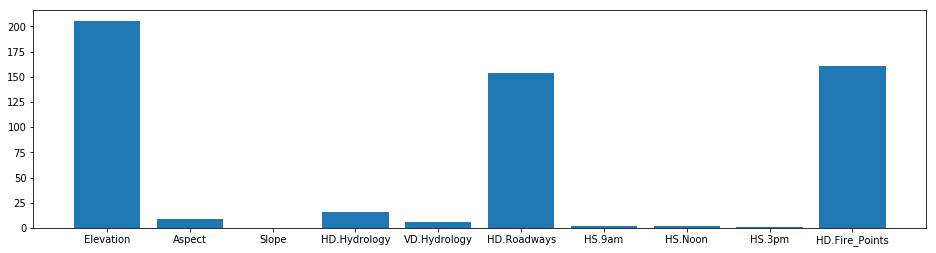

In [61]:
#Plot histogram for difference of means for columns with continuous data
fig=plt.figure(figsize=(16,4))
plt.bar(df_1_2_mean_diff_c.index, df_1_2_mean_diff_c[2])
plt.show()

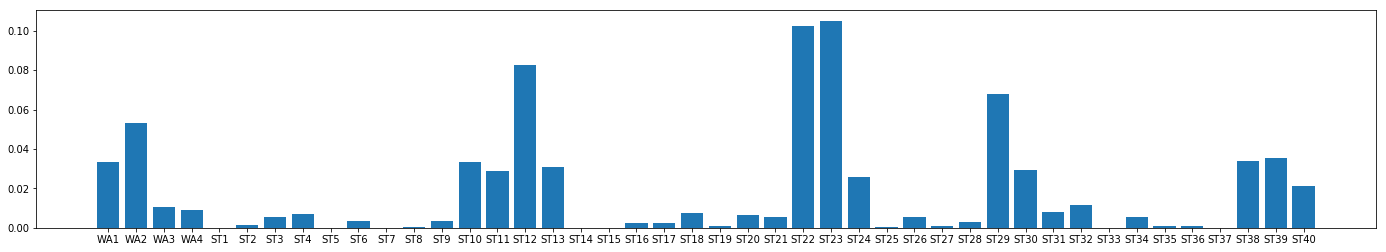

In [62]:
#Plot histogram for difference of means for columns with binary data
fig=plt.figure(figsize=(24,4))
plt.bar(df_1_2_mean_diff_nc.index, df_1_2_mean_diff_nc[2])
plt.show()

Based on the above analysis, we decided to use the top 5 features from the continuous data columns and the top 2 features from the binary columns with the maximum difference in the mean values for cover types 1 and 2 to come up with new features. We tried various combinations of the features and selected 11 new ones as shown in the cells below.

In [63]:
#Copy train and dev datasets into new dataframes for use with new features
#The new dataframes are created so that the models in the appendix section can run without errors
train_data_ftr = train_data.copy()
dev_data_ftr = dev_data.copy()

In [64]:
#add new feature columns based on columns whose mean differences for cover type 1 and 2 are higher compared to other columns
train_data_ftr['fe1'] = train_data_ftr['HD.Roadways'] + train_data_ftr['HD.Fire_Points'] 
dev_data_ftr['fe1'] = dev_data_ftr['HD.Roadways']+ dev_data_ftr['HD.Fire_Points']
train_data_ftr['fe1c'] = train_data_ftr['HD.Roadways'] - train_data_ftr['HD.Fire_Points'] 
dev_data_ftr['fe1c'] = dev_data_ftr['HD.Roadways']- dev_data_ftr['HD.Fire_Points']
train_data_ftr['fe2'] = train_data_ftr['HD.Hydrology'] + train_data_ftr['Aspect'] 
dev_data_ftr['fe2'] = dev_data_ftr['HD.Hydrology']+ dev_data_ftr['Aspect']
train_data_ftr['fe3c'] = train_data_ftr['HD.Roadways'] - train_data_ftr['HD.Hydrology'] 
dev_data_ftr['fe3c'] = dev_data_ftr['HD.Roadways']- dev_data_ftr['HD.Hydrology']
train_data_ftr['fe4'] = train_data_ftr['HD.Fire_Points'] + train_data_ftr['Aspect'] 
dev_data_ftr['fe4'] = dev_data_ftr['HD.Fire_Points']+ dev_data_ftr['Aspect']
train_data_ftr['fe5'] = train_data_ftr['HD.Roadways'] + train_data_ftr['Aspect'] 
dev_data_ftr['fe5'] = dev_data_ftr['HD.Roadways']+ dev_data_ftr['Aspect']
train_data_ftr['fe5c'] = train_data_ftr['HD.Roadways'] - train_data_ftr['Aspect'] 
dev_data_ftr['fe5c'] = dev_data_ftr['HD.Roadways']- dev_data_ftr['Aspect']
train_data_ftr['fe6'] = train_data_ftr['HD.Fire_Points'] + train_data_ftr['HD.Hydrology'] 
dev_data_ftr['fe6'] = dev_data_ftr['HD.Fire_Points']+ dev_data_ftr['HD.Hydrology']
train_data_ftr['fe6c'] = train_data_ftr['HD.Fire_Points'] - train_data_ftr['HD.Hydrology'] 
dev_data_ftr['fe6c'] = dev_data_ftr['HD.Fire_Points']- dev_data_ftr['HD.Hydrology']
train_data_ftr['fe7'] = (train_data_ftr['HD.Fire_Points']* train_data_ftr['ST22']) + (train_data_ftr['HD.Hydrology'] *train_data_ftr['ST22'])
dev_data_ftr['fe7'] = (dev_data_ftr['HD.Fire_Points']*dev_data_ftr['ST22'])+ (dev_data_ftr['HD.Hydrology']*dev_data_ftr['ST22'])
train_data_ftr['fe13'] = train_data_ftr['Elevation'] - train_data_ftr['HD.Fire_Points'] 
dev_data_ftr['fe13'] = dev_data_ftr['Elevation']- dev_data_ftr['HD.Fire_Points']

In [65]:
# #Drop columns with all zeros
train_data_ftr.drop(['ST7','ST15'],axis=1, inplace=True)
dev_data_ftr.drop(['ST7','ST15'],axis=1, inplace=True)

Next we test the top models as highlighted in the [Summary of Baseline Models](#Summary-of-Baseline-Models) and [Feature Reduction](#Feature-Reduction) sections with the training data including engineered features.

In [98]:
#Linear SVC with Feature Reduction - Accuracy 89.10% , Std model
fr_lsvc_m = Pipeline([("std_scalar",MinMaxScaler(copy=True, feature_range=(0, 1))), \
                       ('reduce_dim',SelectFromModel(LinearSVC(penalty="l1", dual=False))),('classifier',ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='entropy',
           max_depth=30, max_features=30, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False))])
start_time=time.time()
fr_lsvc_m.fit(train_data_ftr.values, train_label.values)
fr_lsvc_preds = fr_lsvc_m.predict(dev_data_ftr.values)
end_time=time.time()
time_taken=end_time - start_time 
fr_lsvc_acc=fr_lsvc_m.score(dev_data_ftr.values, dev_label)
print("Time taken by Linear SVC with Feature Reduction: {:3.3f}".format(time_taken))
print("Accuracy for Linear SVC with Feature Reduction: {:3.2%}".format(fr_lsvc_acc))
fr_lsvc_pp=fr_lsvc_m.predict_proba(dev_data_ftr.values) # Predicted Probability
fr_lsvc_p=np.argmax(fr_lsvc_pp, axis=1)
fr_lsvc_p = fr_lsvc_p + 1  # Predicted labels (based on predict_proba)

Time taken by Linear SVC with Feature Reduction: 10.322
Accuracy for Linear SVC with Feature Reduction: 90.58%


In [67]:
#ExtraTreesClassifier with Adaboost - Accuracy 88.94% , Base model
best_etc_am = ExtraTreesClassifier(criterion='entropy', n_estimators=150, max_features=54,
      max_depth=30, random_state=SEED)
abc_etc_am = AdaBoostClassifier(base_estimator=best_etc_am, 
                               n_estimators=500,random_state=SEED)
start_time=time.time()
abc_etc_am.fit(train_data_ftr, train_label)
abc_etc_preds=abc_etc_am.predict(dev_data_ftr)
end_time=time.time()
time_taken=end_time - start_time 
abc_etc_acc=abc_etc_am.score(dev_data_ftr, dev_label)
print("Time taken by ExtraTreesClassifier with Adaboost: {:3.3f}".format(time_taken))
print("Accuracy for ExtraTreesClassifier with Adaboost: {:3.2%}".format(abc_etc_acc))
abc_etc_pp=abc_etc_am.predict_proba(dev_data_ftr) # Predicted Probability
abc_etc_p=np.argmax(abc_etc_pp, axis=1)
abc_etc_p = abc_etc_p + 1  # Predicted labels (based on predict_proba)

Time taken by ExtraTreesClassifier with Adaboost: 5.860
Accuracy for ExtraTreesClassifier with Adaboost: 90.13%


In [68]:
#ExtraTreesClassifier with Feature Reduction - Accuracy 88.78% , Std models
fr_etc_m = Pipeline([("std_scalar",MinMaxScaler(copy=True, feature_range=(0, 1))), \
                       ('reduce_dim',SelectKBest(chi2, k=50)),('classifier',ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='entropy',
           max_depth=30, max_features=50, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False))])
start_time=time.time()
fr_etc_m.fit(train_data_ftr.values, train_label.values)
fr_etc_preds = fr_etc_m.predict(dev_data_ftr.values)
end_time=time.time()
time_taken=end_time - start_time 
fr_etc_acc=fr_etc_m.score(dev_data_ftr.values, dev_label)
print("Time taken by ExtraTreesClassifier with Feature Reduction: {:3.3f}".format(time_taken))
print("Accuracy for ExtraTreesClassifier with Feature Reduction: {:3.2%}".format(fr_etc_acc))
fr_etc_pp=fr_etc_m.predict_proba(dev_data_ftr.values) # Predicted Probability
fr_etc_p=np.argmax(fr_etc_pp, axis=1)
fr_etc_p = fr_etc_p + 1  # Predicted labels (based on predict_proba)

Time taken by ExtraTreesClassifier with Feature Reduction: 4.930
Accuracy for ExtraTreesClassifier with Feature Reduction: 90.00%


In [69]:
#ExtraTreesClassifier - Accuracy 88.68% , Base and Std models
best_etc_m = ExtraTreesClassifier(criterion='entropy', n_estimators=150, max_features=54,
      max_depth=30, random_state=SEED)
start_time=time.time()
best_etc_m.fit(train_data_ftr, train_label)
best_etc_preds=best_etc_m.predict(dev_data_ftr)
end_time=time.time()
time_taken=end_time - start_time 
best_etc_acc=best_etc_m.score(dev_data_ftr, dev_label)
print("Time taken by ExtraTreesClassifier Base Model: {:3.3f}".format(time_taken))
print("Accuracy for ExtraTreesClassifier Base Model: {:3.2%}".format(best_etc_acc))
etc_pp=best_etc_m.predict_proba(dev_data_ftr) # Predicted Probability
etc_p=np.argmax(etc_pp, axis=1)
etc_p = etc_p + 1  # Predicted labels (based on predict_proba)

Time taken by ExtraTreesClassifier Base Model: 5.176
Accuracy for ExtraTreesClassifier Base Model: 90.45%


In [70]:
#GradientBoostingClassifier - Accuracy 88.17% , Std model
gdc_base_m = GDC(n_estimators=100, max_depth=25, max_features=20, min_samples_split=7,random_state=SEED)
best_gdc_m = Pipeline([("std_scalar",std_scalar), ("model",gdc_base_m)])
start_time=time.time()
best_gdc_m.fit(train_data_ftr.values, train_label.values)
best_gdc_preds=best_gdc_m.predict(dev_data_ftr) 
end_time=time.time()
time_taken=end_time - start_time 
best_gdc_acc=best_gdc_m.score(dev_data_ftr, dev_label)
print("Time taken by GradientBoostingClassifier Standardized Model: {:3.3f}".format(time_taken))
print("Accuracy for GradientBoostingClassifier Standardized Model: {:3.2%}".format(best_gdc_acc))
gdc_pp=best_gdc_m.predict_proba(dev_data_ftr)   # Predicted Probability
gdc_p=np.argmax(gdc_pp, axis=1)
gdc_p = gdc_p + 1  # Predicted labels (based on predict_proba)

Time taken by GradientBoostingClassifier Standardized Model: 76.582
Accuracy for GradientBoostingClassifier Standardized Model: 89.81%


In [71]:
#RandomForestClassifier - Accuracy 87.72% , Base model
best_rf_m = RF(criterion='entropy', n_estimators=150, min_samples_split=3, max_features=20,max_depth=None, random_state=SEED)
start_time=time.time()
best_rf_m.fit(train_data_ftr, train_label)
best_rf_preds=best_rf_m.predict(dev_data_ftr) 
end_time=time.time()
time_taken=end_time - start_time 
best_rf_acc=best_rf_m.score(dev_data_ftr, dev_label)
print("Time taken by RandomForestClassifier Base Model: {:3.3f}".format(time_taken))
print("Accuracy for RandomForestClassifier Base Model: {:3.2%}".format(best_rf_acc))
rf_pp=best_rf_m.predict_proba(dev_data_ftr) # Predicted Probability
rf_p=np.argmax(rf_pp, axis=1)
rf_p = rf_p + 1  # Predicted labels (based on predict_proba)

Time taken by RandomForestClassifier Base Model: 10.984
Accuracy for RandomForestClassifier Base Model: 88.94%


In [72]:
#KNeighborsClassifier - Accuracy 85.82% , Base model
best_knn_m = KNeighborsClassifier(n_neighbors=1, metric ='manhattan', leaf_size=10)
start_time=time.time()
best_knn_m.fit(train_data_ftr, train_label)
best_knn_preds=best_knn_m.predict(dev_data_ftr) 
end_time=time.time()
time_taken=end_time - start_time 
best_knn_acc=best_knn_m.score(dev_data_ftr, dev_label)
print("Time taken by KNeighborsClassifier Base Model: {:3.3f}".format(time_taken))
print("Accuracy for KNeighborsClassifier Base Model: {:3.2%}".format(best_knn_acc))
knn_pp=best_knn_m.predict_proba(dev_data_ftr) # Predicted Probability
knn_p=np.argmax(knn_pp, axis=1)
knn_p = knn_p + 1  # Predicted labels (based on predict_proba)

Time taken by KNeighborsClassifier Base Model: 0.274
Accuracy for KNeighborsClassifier Base Model: 82.25%


In [73]:
#SVC - Accuracy 83.47% , Std model
svc_base_m = SVC(C=10.0, class_weight='balanced', gamma=0.3, kernel='rbf', probability=True, random_state=SEED, tol=0.0001)  
best_svc_m = Pipeline([("std_scalar",std_scalar), ("model",svc_base_m)])
start_time=time.time()
best_svc_m.fit(train_data_ftr.values, train_label.values)
best_svc_preds=best_svc_m.predict(dev_data_ftr) 
end_time=time.time()
time_taken=end_time - start_time 
best_svc_acc=best_svc_m.score(dev_data_ftr, dev_label)
print("Time taken by SVC Standardized Model: {:3.3f}".format(time_taken))
print("Accuracy for SVC Standardized Model: {:3.2%}".format(best_svc_acc))
svc_pp=best_svc_m.predict_proba(dev_data_ftr) # Predicted Probability
svc_p=np.argmax(svc_pp, axis=1)
svc_p = svc_p + 1  # Predicted labels (based on predict_proba)

Time taken by SVC Standardized Model: 69.224
Accuracy for SVC Standardized Model: 85.53%


In [74]:
#MLPClassifier - Accuracy 82.7% , Std model
mlp_base_m = MLPClassifier(activation='tanh', alpha=0.00001, random_state=SEED, beta_1 = 0.1, beta_2=0.3)
best_mlp_m = Pipeline([("std_scalar",std_scalar), ("model",mlp_base_m)])
start_time=time.time()
best_mlp_m.fit(train_data_ftr.values, train_label.values)
best_mlp_preds=best_mlp_m.predict(dev_data_ftr) 
end_time=time.time()
time_taken=end_time - start_time 
best_mlp_acc=best_mlp_m.score(dev_data_ftr, dev_label)
print("Time taken by MLPClassifier Standardized Model: {:3.3f}".format(time_taken))
print("Accuracy for MLPClassifier Standardized Model: {:3.2%}".format(best_mlp_acc))
mlp_pp=best_mlp_m.predict_proba(dev_data_ftr) # Predicted Probability
mlp_p=np.argmax(mlp_pp, axis=1)
mlp_p = mlp_p + 1  # Predicted labels (based on predict_proba)

Time taken by MLPClassifier Standardized Model: 13.101
Accuracy for MLPClassifier Standardized Model: 83.65%


In [75]:
#DecisionTreeClassifier with Adaboost - Accuracy 80.37% , Base model
best_dt_am = DecisionTreeClassifier(class_weight='balanced', criterion='entropy', max_features=None,max_depth=None, random_state=SEED)
abc_dt_am = AdaBoostClassifier(base_estimator=best_dt_am, 
                               n_estimators=500,random_state=SEED)
start_time=time.time()
abc_dt_am.fit(train_data_ftr, train_label)
abc_dt_preds=abc_dt_am.predict(dev_data_ftr) 
end_time=time.time()
time_taken=end_time - start_time 
abc_dt_acc=abc_dt_am.score(dev_data_ftr, dev_label)
print("Time taken by DecisionTreeClassifier with Adaboost: {:3.3f}".format(time_taken))
print("Accuracy for DecisionTreeClassifier with Adaboost: {:3.2%}".format(abc_dt_acc))
abc_dt_pp=abc_dt_am.predict_proba(dev_data_ftr) # Predicted Probability
abc_dt_p=np.argmax(abc_dt_pp, axis=1)
abc_dt_p = abc_dt_p + 1  # Predicted labels (based on predict_proba)

Time taken by DecisionTreeClassifier with Adaboost: 0.450
Accuracy for DecisionTreeClassifier with Adaboost: 81.22%


In [76]:
#DecisionTreeClassifier - Accuracy 80.08% , Base model
best_dt_m = DecisionTreeClassifier(class_weight='balanced', criterion='entropy', max_features=None,max_depth=None, random_state=SEED)
start_time=time.time()
best_dt_m.fit(train_data_ftr, train_label)
best_dt_preds=best_dt_m.predict(dev_data_ftr) 
end_time=time.time()
time_taken=end_time - start_time 
best_dt_acc=best_dt_m.score(dev_data_ftr, dev_label)
print("Time taken by DecisionTreeClassifier Base Model: {:3.3f}".format(time_taken))
print("Accuracy for DecisionTreeClassifier Base Model: {:3.2%}".format(best_dt_acc))
dt_pp=best_dt_m.predict_proba(dev_data_ftr) # Predicted Probability
dt_p=np.argmax(dt_pp, axis=1)
dt_p = dt_p + 1  # Predicted labels (based on predict_proba)

Time taken by DecisionTreeClassifier Base Model: 0.405
Accuracy for DecisionTreeClassifier Base Model: 80.63%


The top 5 classifiers and the corresponding models resulting the best accuracy with engineered features are:
1. Linear SVC with Feature Reduction - 90.58% (SVC Base model had an accuracy of 85.53%)
2. ExtraTreesClassifier with Base Model - 90.45% (The other two variations of Extra Trees Classifier also resulted in accuracies more than 90%)
3. GradientBoostingClassifier - 89.81%
4. RandomForestClassifier  - 88.94%
5. MLPClassifier - 83.65%

The top model with engineered features is **Linear SVC with Feature Reduction** with an accuracy of **90.58%**. Of the top 5, the ExtraTreesClassifier with Base Model was the fastest and the GradientBoostingClassifier was the slowest. The predominant cover type was predicted to be 'Aspen' as before.

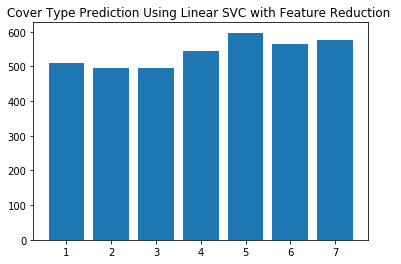

Predominant cover type predicted by Linear SVC with Feature Reduction using engineered features: Aspen


In [77]:
plot_cover(fr_lsvc_p, 'Linear SVC with Feature Reduction ')

print("Predominant cover type predicted by {}: {}"
      .format('Linear SVC with Feature Reduction using engineered features', cover_types[np.unique(fr_lsvc_p)
                                      [np.argmax(np.unique(fr_lsvc_p, return_counts=True)[1])] - 1]))

We then tried to create some custom enemble models using various combinations of the predicted probabilities for the top 3,4 and 5 models. The best accuracy we got from those combinations was 90.53% using the model shown in the cell below. 'Aspen' was predicted as the predominant cover type in this case as well.

In [99]:
# Predict Labels based on the sum of the predicted probabilities of the top models
# weighted by the accuracy 

# Calculate sum of probabilities weighted by the accuracy
sum_wt_pp=np.sum((fr_lsvc_pp* fr_lsvc_acc, etc_pp* best_etc_acc, gdc_pp* best_gdc_acc), axis=0)
# Select index for maximum probability
sum_wt_p=np.argmax(sum_wt_pp, axis=1)
# Predict Label
sum_wt_p = sum_wt_p + 1
# Calculate Accuracy
sum_wt_acc = sum(sum_wt_p==dev_label)/len(dev_label)

print("Accuracy with sum of weighted predicted probabilities: {:3.2%}".format(sum_wt_acc))

Accuracy with sum of weighted predicted probabilities: 90.53%


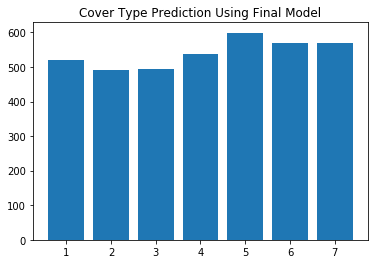

Predominant cover type predicted by Final Model: Aspen


In [79]:
plot_cover(sum_wt_p, 'Final Model')

print("Predominant cover type predicted by {}: {}"
      .format('Final Model', cover_types[np.unique(sum_wt_p)
                                      [np.argmax(np.unique(sum_wt_p, return_counts=True)[1])] - 1]))

### Summary of Feature Engineering

Back to [Contents](#Contents)

The prediction accuracy for most of the models went up after using the engineered features. All the models predicted with an accuracy greater than 80%. The Linear SVC model with Feature Reduction was the most accurate at 90.58%. Our attempt at creating a custom ensemble predictions using the predicted probabilities from the engineered models got us an accuracy of 90.53%. 

## Test Data Predictions

Back to [Contents](#Contents)

The final model we used for test data predictions was the Linear SVC with Feature Reduction using engineered features which had resulted in the best accuracy of all the models we created.

In [80]:
#Make a copy of the test dataset
test_data=test_data_orig.copy()
#Drop Id column
test_data.drop(['Id'],axis=1, inplace=True)

In [81]:
#Add new feature columns for test data
test_data['fe1'] = test_data['Horizontal_Distance_To_Roadways'] + test_data['Horizontal_Distance_To_Fire_Points'] 
test_data['fe1c'] = test_data['Horizontal_Distance_To_Roadways'] - test_data['Horizontal_Distance_To_Fire_Points'] 
test_data['fe2'] = test_data['Horizontal_Distance_To_Hydrology'] + test_data['Aspect'] 
test_data['fe3c'] = test_data['Horizontal_Distance_To_Roadways'] - test_data['Horizontal_Distance_To_Hydrology'] 
test_data['fe4'] = test_data['Horizontal_Distance_To_Fire_Points'] + test_data['Aspect'] 
test_data['fe5'] = test_data['Horizontal_Distance_To_Roadways'] + test_data['Aspect'] 
test_data['fe5c'] = test_data['Horizontal_Distance_To_Roadways'] - test_data['Aspect'] 
test_data['fe6'] = test_data['Horizontal_Distance_To_Fire_Points'] + test_data['Horizontal_Distance_To_Hydrology'] 
test_data['fe6c'] = test_data['Horizontal_Distance_To_Fire_Points'] - test_data['Horizontal_Distance_To_Hydrology'] 
test_data['fe7'] = (test_data['Horizontal_Distance_To_Fire_Points']* test_data['Soil_Type22']) + (test_data['Horizontal_Distance_To_Hydrology'] *test_data['Soil_Type22'])
test_data['fe13'] = test_data['Elevation'] - test_data['Horizontal_Distance_To_Fire_Points'] 
#Drop columns from test data
test_data.drop(['Soil_Type7','Soil_Type15'],axis=1, inplace=True)

#### Linear SVC with Feature Reduction and Engineered Features

In [82]:
#Predict test data 
fr_lsvc_p_tst=fr_lsvc_m.predict(test_data.values)

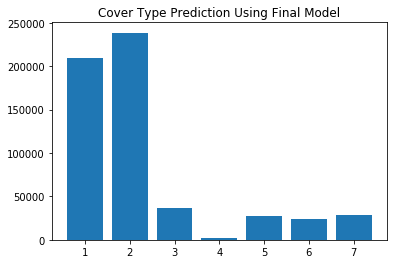

Predominant cover type predicted by Final Model: Lodgepole Pine


In [83]:
plot_cover(fr_lsvc_p_tst, 'Final Model')

print("Predominant cover type predicted by {}: {}"
      .format('Final Model', cover_types[np.unique(fr_lsvc_p_tst)
                                      [np.argmax(np.unique(fr_lsvc_p_tst, return_counts=True)[1])] - 1]))

In [84]:
test_data_sub = test_data_orig.copy()
test_data_sub['Cover_Type']=fr_lsvc_p_tst
test_data_sub_df = test_data_sub.loc[:, ['Id','Cover_Type']]
test_data_sub_df.to_csv('Submission_FinalModel.csv', index=None)

The model predicted 'Lodgepole Pine' to be the predominant cover type. This model gave an accuracy of **79.08%** in Kaggle.

Since Kaggle allows us to submit multiple models and the select two for final submission, we also submitted the results predicted by the custom ensemble model (our second best model) as well as the Extra Trees Classifier with Base Model (our third best model).

#### Custom Ensemble Model

In [85]:
#Get predicted probabilities for the top 3 models
fr_lsvc_pp_tst=fr_lsvc_m.predict_proba(test_data.values) 
etc_pp_tst=best_etc_m.predict_proba(test_data) 
gdc_pp_tst=best_gdc_m.predict_proba(test_data)   

#Calculate custom probability
sum_pp_tst=np.sum((fr_lsvc_pp_tst* fr_lsvc_acc, etc_pp_tst* best_etc_acc, gdc_pp_tst* best_gdc_acc), axis=0)
# Select index for maximum probability
sum_p_tst=np.argmax(sum_pp_tst, axis=1)
# Predict Label
sum_p_tst = sum_p_tst + 1

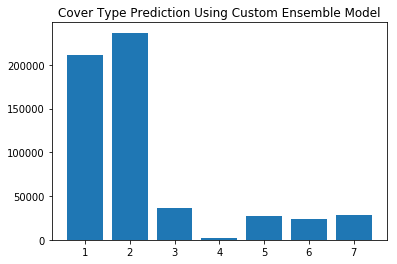

Predominant cover type predicted by Custom Ensemble Model: Lodgepole Pine


In [86]:
plot_cover(sum_p_tst, 'Custom Ensemble Model')

print("Predominant cover type predicted by {}: {}"
      .format('Custom Ensemble Model', cover_types[np.unique(sum_p_tst)
                                      [np.argmax(np.unique(sum_p_tst, return_counts=True)[1])] - 1]))

In [87]:
test_data_sub = test_data_orig.copy()
test_data_sub['Cover_Type']=sum_p_tst
test_data_sub_df = test_data_sub.loc[:, ['Id','Cover_Type']]
test_data_sub_df.to_csv('Submission_Ensemble.csv', index=None)

The model also predicted 'Lodgepole Pine' to be the predominant cover type. This model gave an accuracy of **78.61%** in Kaggle.

#### Extra Trees Classifier with Base Model

In [88]:
#Predict test data 
etc_p_tst=best_etc_m.predict(test_data.values)

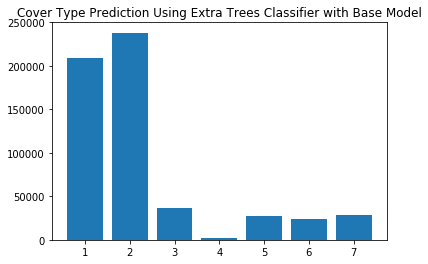

Predominant cover type predicted by Extra Trees Classifier with Base Model: Lodgepole Pine


In [89]:
plot_cover(etc_p_tst, 'Extra Trees Classifier with Base Model')

print("Predominant cover type predicted by {}: {}"
      .format('Extra Trees Classifier with Base Model', cover_types[np.unique(etc_p_tst)
                                      [np.argmax(np.unique(etc_p_tst, return_counts=True)[1])] - 1]))

In [90]:
test_data_sub = test_data_orig.copy()
test_data_sub['Cover_Type']=etc_p_tst
test_data_sub_df = test_data_sub.loc[:, ['Id','Cover_Type']]
test_data_sub_df.to_csv('Submission_ETCModel.csv', index=None)

The model also predicted 'Lodgepole Pine' to be the predominant cover type. This model gave an accuracy of **78.67%** in Kaggle.

Shown below is a screenshot of the scores from Kaggle

<img src="KaggleScores.png">

## Conclusions

Back to [Contents](#Contents)

The ForestCoverPrediction has 55 features and 15120 observations for train dataset and 565892 observations for test dataset. There are 7 label types corresponding to 7 cover types. 

We split the train data into train and dev with 75-25 splits and did EDA on the dataset. Based on the EDA results, we tried various prediction models and obtained the following prediction accuracies:

KNN, Maximum accuracy: 85.82%      
Gaussian Naive Bayes, Maximum accuracy: 60.40%      
Bernoulli Naive Bayes, Maximum accuracy: 62.65%       
GMM, Maximum accuracy: 78%     
Linear Regression, Maximum accuracy: 40.25%         
Logistic Regression, Maximum accuracy: 67.70%         
Neural Network, Maximum accuracy: 82.70%         
Decision Tree, Maximum accuracy: 80.08%        
Random Forest, Maximum accuracy: 87.72%       
Gradient Boosting Classifier, Maximum accuracy: 87.80%        
Stochastic gradient descent (SGD), Maximum accuracy: 60.77%         
Extra Trees Classifier, Maximum accuracy: 88.68%         
Support Vector Machines, Maximum accuracy: 83.47%          
with Adaboost, Maximum accuracy: 88.94%      

We notice that Extra Trees Classifier with Adaboost resulted in the best accuracy of 88.94%. In order to improve the predction accuracy, We tested the top performing models above with Feature Reduction using KBest and Percentiles and improved the prediction accuracy to 89.10%. We identified that conifers where the most confused pairs within each prediction model, our sample of confused conifers are represented by Lodgepole Pine and Spruce / Fir. Therefore we did some feature engineering, considering features with more differences between Lodgepole Pine and Spruce / Fir, the algorithm improved the accuracy to 90.58%.

Moreover, using our best performing prediction model, we predicted the labels of the test dataset. Predominant cover type predicted by Final Model model is Lodgepole Pine. 

Finally, we sumbitted our models to Kaggle, and this model gave an accuracy of 79.08% in Kaggle. This accuracy is 11.5 points lower that our best score. Our hypothesis is that the representation of conifers is larger in the test data so that is reducing our prediction score.

## Appendix

Back to [Contents](#Contents)

### Other Models

This section shows the code for some of the other models we tried. The predictions from these models didn't result in good enough accuracies so we didnot use them for further analysis and predictions. Just like the models that we ended up using, we tried these models to predict the cover type based on standardized, binarized and PCA reduced data as well as with cross validation and using just continuous features. The results on the tests that resulted in the best accuracies for these models are shown here. We also used Grid Search CV to determine the best parameters where applicable. However the grid search code is not shown here to keep the notebook clean.

#### 1. Gaussian Naive Bayes

Back to [Contents](#Contents)


Model: GaussianNB(priors=None)


Time taken by Base Model: 0.023
Accuracy for Base Model: 59.15%

Time taken by Cross Validation Model: 0.417
Accuracy for Cross Validation Model: 59.15%

Time taken by Continuous Data Model: 0.008
Accuracy for Continuous Data Model: 60.40%

 Maximum accuracy using Gaussian NB: 60.40%


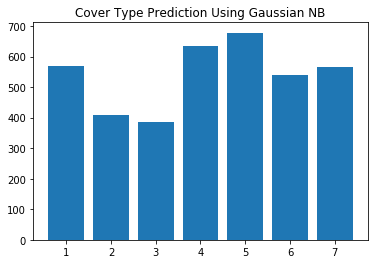

Predominant cover type predicted by Gaussian NB model: Aspen

Confusion Matrix:
[[330  68   6   0  39   6  82]
 [140 187  21   0 129  35  28]
 [  0   8 210 107  62 138   0]
 [  0   0  36 443   0  57   0]
 [  1 124   2   0 399  45   0]
 [  0  22 108  83  46 259   0]
 [ 98   1   2   0   3   0 455]]

Cover Type with worst precision: 2
Cover Type with worst recall: 2
Most confused cover types combination is (2,1)
Labels for the most confused cover type combination are (Lodgepole Pine,Spruce/Fir)


In [91]:
model_name="Gaussian NB"
gnb_m = GaussianNB()
l_gnb = test_model_variations(gnb_m, True, False, False, True, True, False)

print("\n Maximum accuracy using {}: {:3.2%}".format(model_name, np.amax(l_gnb[1])))
max_acc_ind=np.argmax(l_gnb[1])  #Index for maximum accuray
best_preds=l_gnb[2][max_acc_ind]  #Best prediction
#Plot best predicted results
plot_cover(best_preds, model_name)

print("Predominant cover type predicted by {} model: {}"
      .format(model_name, cover_types[np.unique(best_preds)
                                      [np.argmax(np.unique(best_preds, return_counts=True)[1])] - 1]))

print_confusion(dev_label, best_preds)

#### 2. Bernoulli Naive Bayes

Back to [Contents](#Contents)


Model: BernoulliNB(alpha=1e-05, binarize=0.0, class_prior=None, fit_prior=True)


Time taken by Base Model: 0.014
Accuracy for Base Model: 59.44%

Time taken by Standardized Model: 0.024
Accuracy for Standardized Model: 62.65%

Time taken by Binarized Data Model: 0.010
Accuracy for Binarized Data Model: 61.88%

Time taken by Cross Validation Model: 0.361
Accuracy for Cross Validation Model: 59.39%

 Maximum accuracy using Bernoulli NB: 62.65%


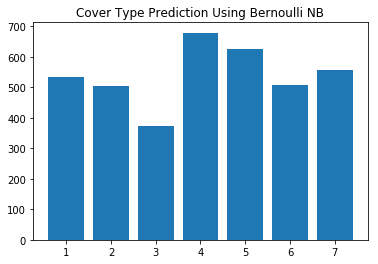

Predominant cover type predicted by Bernoulli NB model: Cottonwood/Willow

Confusion Matrix:
[[270 136   1   0  50   4  70]
 [141 247   5   2 107  20  18]
 [  1   3 222 120  29 150   0]
 [  0   0  29 485   0  22   0]
 [ 67  84  12   0 385  20   3]
 [  1   9 105  72  39 292   0]
 [ 53  24   0   0  15   0 467]]

Cover Type with worst precision: 2
Cover Type with worst recall: 3
Most confused cover types combination is (3,6)
Labels for the most confused cover type combination are (Ponderosa Pine,Douglas-fir)


In [92]:
model_name="Bernoulli NB"

bnb_m = BernoulliNB(alpha=0.00001)
l_bnb = test_model_variations(bnb_m, True, True, True, True, False, False)

print("\n Maximum accuracy using {}: {:3.2%}".format(model_name, np.amax(l_bnb[1])))
max_acc_ind=np.argmax(l_bnb[1])  #Index for maximum accuray
best_preds=l_bnb[2][max_acc_ind]  #Best prediction
#Plot best predicted results
plot_cover(best_preds, model_name)

print("Predominant cover type predicted by {} model: {}"
      .format(model_name, cover_types[np.unique(best_preds)
                                      [np.argmax(np.unique(best_preds, return_counts=True)[1])] - 1]))

print_confusion(dev_label, best_preds)

#### 3. GMM

Back to [Contents](#Contents)

In [93]:
# best train accuracy
best_train_accuracy = 0.0
    
# best PCA components
best_pca_n = 2     
    
# best GMM components
best_gmm_n = 1
    
# best covariance type
best_cov = ' '
    
#loop over PCA components 
for i in range(4, 8):
    pca = PCA(n_components=i)
    trans_train_data = pca.fit_transform(train_data)
    
    # train_data with label 1 to 7

    data_1 = trans_train_data[train_label==1]
    data_2 = trans_train_data[train_label==2]
    data_3 = trans_train_data[train_label==3]
    data_4 = trans_train_data[train_label==4]
    data_5 = trans_train_data[train_label==5]
    data_6 = trans_train_data[train_label==6]
    data_7 = trans_train_data[train_label==7]
        
    # the covariance matrix type ('spherical', 'diag', 'tied', 'full')
    cov_type = ['spherical', 'diag', 'tied', 'full']
        
    #loop over cov_type        
    for cov in cov_type:
            
        # loop over GMM components 
        for nn in range (10, 11):
            
            gmm_1 = GMM(n_components=nn, covariance_type=cov, random_state=0).fit(data_1)
            gmm_2 = GMM(n_components=nn, covariance_type=cov, random_state=0).fit(data_2)
            gmm_3 = GMM(n_components=nn, covariance_type=cov, random_state=0).fit(data_3)
            gmm_4 = GMM(n_components=nn, covariance_type=cov, random_state=0).fit(data_4)
            gmm_5 = GMM(n_components=nn, covariance_type=cov, random_state=0).fit(data_5)
            gmm_6 = GMM(n_components=nn, covariance_type=cov, random_state=0).fit(data_6)
            gmm_7 = GMM(n_components=nn, covariance_type=cov, random_state=0).fit(data_7)
                        
            # probability of the test data
            prob_1 = gmm_1.score_samples(trans_train_data)
            prob_1 = np.exp(prob_1)

            prob_2 = gmm_2.score_samples(trans_train_data)
            prob_2 = np.exp(prob_2)

            prob_3 = gmm_3.score_samples(trans_train_data)
            prob_3 = np.exp(prob_3)

            prob_4 = gmm_4.score_samples(trans_train_data)
            prob_4 = np.exp(prob_4)  

            prob_5 = gmm_5.score_samples(trans_train_data)
            prob_5 = np.exp(prob_5)

            prob_6 = gmm_6.score_samples(trans_train_data)
            prob_6 = np.exp(prob_6)

            prob_7 = gmm_7.score_samples(trans_train_data)
            prob_7 = np.exp(prob_7)

            prob = np.vstack((prob_1, prob_2, prob_3, prob_4,prob_5,prob_6,prob_7)).T

            train_pred = np.argmax(prob, axis=1)+1
                
            # calculate accuracy by comparing prediction with test_lables
            accuracy = 1. * sum(train_pred == train_label) / len(train_label)

            if accuracy > best_train_accuracy:
                best_train_accuracy = accuracy
                best_pca_n = i
                best_gmm_n = nn
                best_cov = cov
     
                                                
print("best train accuracy: %.3f" %(best_train_accuracy))                 
print("best PCA component: ", best_pca_n)
print("best GMM component: ", best_gmm_n)
print("best covariance type: ", best_cov)

best train accuracy: 0.780
best PCA component:  7
best GMM component:  10
best covariance type:  full


#### 4. Linear Regression

Back to [Contents](#Contents)


Model: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)


Time taken by Base Model: 0.016
Accuracy for Base Model: 40.25%

Time taken by Cross Validation Model: 0.582
Accuracy for Cross Validation Model: 40.24%

 Maximum accuracy using Linear Regression: 40.25%


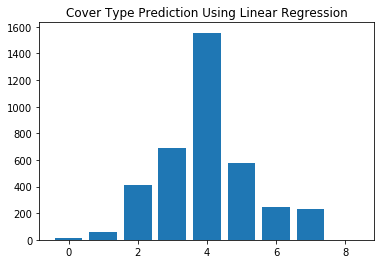

Predominant cover type predicted by Linear Regression model: Cottonwood/Willow

Confusion Matrix:
[[  0   0   0   0   0   0   0   0   0]
 [ 10  37 172 210  47  21  27   7   0]
 [  3  17 182 224  82  28   2   2   0]
 [  0   0   0  21 388 116   0   0   0]
 [  0   0   0  11 470  55   0   0   0]
 [  0   0  25 145 310  91   0   0   0]
 [  0   0   0  18 251 249   0   0   0]
 [  0   5  30  58   8  16 217 223   2]
 [  0   0   0   0   0   0   0   0   0]]

Cover Type with worst precision: 1
Cover Type with worst recall: 1
Most confused cover types combination is (4,5)
Labels for the most confused cover type combination are (Cottonwood/Willow,Aspen)


In [94]:
model_name="Linear Regression"
lr_m = LinearRegression()
l_lr = test_model_variations(lr_m, True, False, False, True, False, False)

print("\n Maximum accuracy using {}: {:3.2%}".format(model_name, np.amax(l_lr[1])))
max_acc_ind=np.argmax(l_lr[1])  #Index for maximum accuray
best_preds=np.rint(l_lr[2][max_acc_ind]).astype(int)  #Best prediction

# Plot best predicted results
plot_cover(best_preds, model_name)

print("Predominant cover type predicted by {} model: {}"
      .format(model_name, cover_types[np.unique(best_preds)
                                      [np.argmax(np.unique(best_preds, return_counts=True)[1])] - 1]))

print_confusion(dev_label, best_preds)

#### 5. Logistic Regression

Back to [Contents](#Contents)


Model: LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.01,
          verbose=0, warm_start=False)


Time taken by Standardized Model: 1.254
Accuracy for Standardized Model: 67.70%

Time taken by Binarized Data Model: 0.106
Accuracy for Binarized Data Model: 63.92%

 Maximum accuracy using Logistic Regression: 67.70%


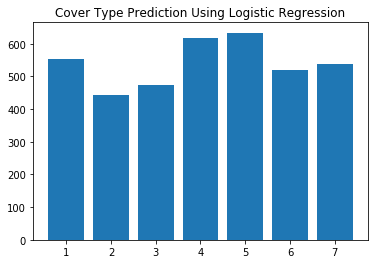

Predominant cover type predicted by Logistic Regression model: Aspen

Confusion Matrix:
[[344  89   1   0  37   5  55]
 [124 266   7   2 115  20   6]
 [  0   3 275  87  19 141   0]
 [  0   0  20 484   0  32   0]
 [ 12  65  51   0 417  26   0]
 [  0  19 117  46  41 295   0]
 [ 72   1   3   0   5   0 478]]

Cover Type with worst precision: 6
Cover Type with worst recall: 2
Most confused cover types combination is (3,6)
Labels for the most confused cover type combination are (Ponderosa Pine,Douglas-fir)


In [95]:
model_name="Logistic Regression"
logr_m = LogisticRegression(penalty='l2',C=0.1, tol=0.01, random_state=SEED)
l_logr = test_model_variations(logr_m, False, True, True, False, False, False)

print("\n Maximum accuracy using {}: {:3.2%}".format(model_name, np.amax(l_logr[1])))
max_acc_ind=np.argmax(l_logr[1])  #Index for maximum accuray
best_preds=l_logr[2][max_acc_ind]  #Best prediction
#Plot best predicted results
plot_cover(best_preds, model_name)

print("Predominant cover type predicted by {} model: {}"
      .format(model_name, cover_types[np.unique(best_preds)
                                      [np.argmax(np.unique(best_preds, return_counts=True)[1])] - 1]))

print_confusion(dev_label, best_preds)

#### 6. Stochastic Gradient Descent

Back to [Contents](#Contents)


Model: SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l1', power_t=0.5, random_state=0, shuffle=True,
       tol=None, verbose=0, warm_start=False)


Time taken by Standardized Model: 0.146
Accuracy for Standardized Model: 58.78%

Time taken by Binarized Data Model: 0.142
Accuracy for Binarized Data Model: 60.77%

 Maximum accuracy using Stochastic gradient descent: 60.77%


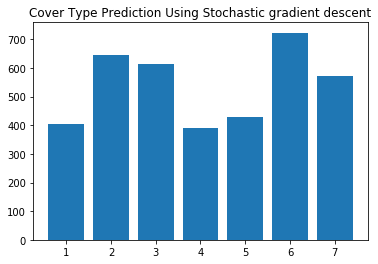

Predominant cover type predicted by Stochastic gradient descent model: Douglas-fir

Confusion Matrix:
[[230 169   2   0  37  13  80]
 [ 89 309  11   0  64  53  14]
 [  0   8 291  28   5 193   0]
 [  0   0 113 352   0  71   0]
 [ 23 134  62   0 299  53   0]
 [  0  15 132  10  23 338   0]
 [ 64  11   3   0   1   2 478]]

Cover Type with worst precision: 6
Cover Type with worst recall: 1
Most confused cover types combination is (3,6)
Labels for the most confused cover type combination are (Ponderosa Pine,Douglas-fir)


In [96]:
model_name="Stochastic gradient descent"
sgd_m = SGDClassifier(alpha=0.0001, loss='hinge',  penalty="l1", random_state=SEED)
l_sgd = test_model_variations(sgd_m, False, True, True, False, False, False)

print("\n Maximum accuracy using {}: {:3.2%}".format(model_name, np.amax(l_sgd[1])))
max_acc_ind=np.argmax(l_sgd[1])  #Index for maximum accuray
best_preds=l_sgd[2][max_acc_ind]  #Best prediction

#Plot best predicted results
plot_cover(best_preds, model_name)

print("Predominant cover type predicted by {} model: {}"
      .format(model_name, cover_types[np.unique(best_preds)
                                      [np.argmax(np.unique(best_preds, return_counts=True)[1])] - 1]))

print_confusion(dev_label, best_preds)